# Modelado predictivo de órdenes de venta por internet

## **Abstracto**

Hace unos años lo más usual era hacer la compra semanal en el supermercado cerca de casa, cada cierto tiempo ir a las tiendas a comprar ropa para la estación, cuando se necesitaba un artefacto tecnológico como televisión, móvil u ordenador se iba al local especializado a analizar las diferentes opciones.

Los tiempos cambian y las tendencias de consumo también. Según el estudio anual de e-commerce de la IAB 2017, 7 de cada 10 internautas compran online.

El comercio electrónico o E-Commerce, está siguiendo una tendencia alcista desde hace ya muchos años. Tanto a nivel nacional como internacional son cada vez más las empresas que optan por adaptarse a las tendencias eCommerce. Parece que este mercado no tiene techo de crecimiento.

Este contexto genera la motivación de esta propuesta de análisis, dado que grandes competidores están poniendo foco en esta nueva forma de comercio, lo que generará en el corto plazo mayor competencia y una necesidad de eficientizar los procesos internos que implica una compra por internet.


##**Contexto comercial**

El incremento exponencial de personas con acceso a internet en los últimos años, la globalización y la reciente pandemia, han conformado el escenario ideal para situar a las ventas en línea como reales protagonistas de la economía mundial.

La tendencia indica que las personas están cambiando sus hábitos de consumo, disminuyendo su presencia en shoppings y centros comerciales e incrementando las compras desde la comodidad de un dispositivo con conexión a internet.

Dado lo descripto, una importante empresa de comercio electrónico de Estados Unidos ha recopilado información sobre las órdenes de compra generada por clientes en forma online en un determinado período de tiempo, de tal manera de disponibilizarla al equipo de Data Science para que se pueda analizar e identificar patrones de consumo, tendencias de venta, agrupaciones en clústeres o toda información que permita la toma de decisiones y el ajuste interno, de tal manera de reducir costos operativos y maximizar márgenes de utilidad.
<br>
<br>
<br>
###**Problema comercial** 
La tarea del equipo de Data Science consiste en trabajar los datos proporcionados, realizar una limpieza que permita manipularlos correctamente con el mínimo error y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.
<br>
<br>
<br>
###**Audiencia** 
Este análisis se pondrá a disposición del equipo gerencial de la compañía, para que sea información de valor para definir y ejecutar las mejores estrategias comerciales a fin de maximizar los beneficios de la compañía.
<br>
<br>
<br>
## **Contexto analítico**

Se proporciona un archivo CSV (extraído de kaggle) el cuál contiene información sobre ordenes de compra online que clientes han generado a la empresa durante los años 2020 y 2021; con columnas cómo por ejemplo fecha de orden, estado de la orden, producto solicitado, cantidad y precio total, método de pago utilizado, etcétera.

Link Kaggle: https://www.kaggle.com/datasets/ytgangster/online-sales-in-usa

La tarea asignada consiste en: 
* Realizar un proceso de data preparation y data wrangling que minimice errores, dado que el cliente desconoce la calidad de la información suministrada
* Leer y transformar los datos para su visualización
* Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos

##**Definición de objetivos del análisis**

Cómo se mencionó, el cliente desea que se analice la información de órdenes de compra de los últimos años a fin de identificar patrones, tendencias de consumo y potenciales segmentaciones.

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuesta:

* ¿Cuál es la región con mayor participación en ventas online? ¿La región/estado con mayor incremento en ventas online?
* ¿Cuáles son las categorías con tendencia a incrementar o disminuir su cantidad de ordenes online?
* ¿Cómo es la situación de las órdenes de compra canceladas?
* ¿Se podría identificar algún patrón al respecto?
* ¿Existen factores externos que podrían incidir en la cancelación de órdenes de venta?

##**Importación de librerías necesarias:**

In [ ]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import seaborn as sb

import requests
import json

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

!pip install varclushi
from varclushi import VarClusHi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 2.1 MB/s eta 0:00:00


#<u>**Análisis exploratorio de datos (EDA)**</u>

##<u>**Análisis exploratorio de datos y corrección de datos incoherentes**</u>

Importaremos a continuación el archivo 'csv' desde GitHub:

In [ ]:
url = 'https://raw.githubusercontent.com/federicomoscardo/coderhouse_datascience/main/sales.csv'
df = pd.read_csv(url)
df.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


---
Utilizamos la función INFO para analizar los tipos de datos de las columnas del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

Las columnas son numéricas y de tipo string y se listan a continuación:

* order_id
* **order_date** --> fecha de la orden de compra
* **status** --> estado de la orden
* item_id
* sku
* **qty_ordered** --> cantidad ordenada del producto
* **price** --> precio del producto
* **value** --> cantidad por precio
* **discount_amount** --> monto de descuento
* **total** --> precio final de compra
* **category** --> categoría del producto
* **payment_method** --> método de pago
* **bi_st** --> tipo de facturación
* cust_id 
* year
* month
* ref_num --> referencia del cliente (Dr, Sr, Ing, etc)
* First_Name
* Middle_Name
* Last_Name
* **Gender** --> género del comprador
* **Age** --> edad del comprador
* full_name
* Email
* Customer_since --> Fecha de alta del cliente
* SSN--> Número de seguro social
* Phone_No
* Place_Name --> Ubicación del cliente
* County --> Condado
* **City** --> Localidad
* State --> Estado
* Zip -- Código postal
* **Region** --> Región
* User_Name --> nombre de usuario del cliente
* Discount_Percent --> porcentaje de descuento asociado


---
Para saber el tamaño del dataset, usamos la función SHAPE

**Resultado:** este dataset posee 36 columnas y 286392 filas.

In [ ]:
df.shape

(286392, 36)

---
A través de la función DESCRIBE, tendremos un primer análisis general del dataset. De las columnas más importantes del dataset que ponemos a continuación, lo aplicaremos a las numéricas que nos aportan información:
* order_date
* status
* qty_ordered
* price
* value
* discount_amount
* total
* category
* payment_method
* age
* Customer_since
* County
* City
* State
* Zip
* Region


In [ ]:
df[['qty_ordered','price','value','discount_amount','total','age','year','Discount_Percent']].describe().round(2)

,qty_ordered,price,value,discount_amount,total,age,year,Discount_Percent
count,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00
mean,3.01,851.39,885.88,70.04,815.84,46.49,2020.62,6.07
std,4.57,1741.75,2073.25,256.88,1983.58,16.67,0.49,10.10
min,1.00,0.00,0.00,0.00,0.00,18.00,2020.00,0.00
25%,2.00,49.90,49.90,0.00,49.90,32.00,2020.00,0.00
50%,2.00,119.00,158.97,0.00,149.80,47.00,2021.00,0.00
75%,3.00,950.00,910.00,18.38,800.00,61.00,2021.00,11.00
max,501.00,101262.59,101262.59,30213.15,101262.59,75.00,2021.00,75.00


---
Para las columnas anteriores, controlaremos qué cantidad de ceros hay en ellas:

In [ ]:
cuenta_ceros = (df[['qty_ordered','price','value','discount_amount','total','age','year','Discount_Percent']] == 0).sum()
print(cuenta_ceros)

qty_ordered              0
price                 1574
value                19146
discount_amount     200658
total                19146
age                      0
year                     0
Discount_Percent    183086
dtype: int64


**Resultado:** 

Los ceros en **discount_amount** y **discount_percent** son valores válidos, ya que una venta podría no tener descuentos.

No pasa lo mismo con los valores CERO en **price, value y total**, dado que no tendría coherencia que existan precios CERO. Tendremos que atender qué haremos con esto.

<br>

Para ello, primero aclaramos los datos con los que estamos trabajando:
* **qty_ordered:** es la cantidad ordenada de un producto.
* **price:** es el precio unitario del producto
* **value:** es el subtotal previo a aplicar los decuentos (podemos calcularlo haciendo qty_ordered * price)
* **discount_percent:** es el porcentaje de descuento de la compra
* **discount_amount:** es el valor del descuento (podemos calcularlo haciendo value * discount_percent)
* **total:** es el valor total de la compra luego de aplicar los descuentos

<br>

Aclarado lo anterior, sacamos algunas conclusiones:
* No es lógico que tengamos distintas cantidades de valores CERO entre las columnas **discount_percent** y **discount_amount**, ya que una depende de la otra.
* Tampoco es coherente que tengamos diferentes cantidades de valores CERO entre **price** y **value**, ya que también estas dependen entre sí (value=price*qty_ordered y NO TENEMOS valores CERO en qty_ordered).

<br>

Haciendo el análisis del dataset, vimos que restando UNA UNIDAD (1) a la columna de **qty_ordered** y multiplicando por el precio sí nos da correctamente el valor de la columna **value**.

In [ ]:
df_testeo = df[['qty_ordered','price','value','Discount_Percent','discount_amount','total']].copy()
df_testeo['qty_ordered_modificada'] = df_testeo['qty_ordered'] - 1
df_testeo['value_modificado'] = df_testeo['qty_ordered_modificada'] * df_testeo['price']
validacion = (df_testeo.value - df_testeo.value_modificado).sum()
# df_testeo.head(5)
print(validacion.round(2))

0.0


Ahora, si restamos UNA UNIDAD (1) a la columna de **qty_ordered**, qué pasaría con las compras que tienen qty_ordered = 1?

In [ ]:
total_qty_ordered_1 = (df['qty_ordered'] == 1).sum()
print("Total de órdenes con Cantidad Ordenada 1 (UNO):",total_qty_ordered_1)
filtro_qty_ordered_1 = df['qty_ordered']==1
cuenta_status_completed = df.groupby(df['status'][filtro_qty_ordered_1]).order_id.count()
print("DETALLE POR ESTADO:")
print(cuenta_status_completed)

Total de órdenes con Cantidad Ordenada 1 (UNO): 17572
DETALLE POR ESTADO:
status
canceled          9602
closed              11
cod                  4
complete          3956
order_refunded    1171
paid                27
payment_review       4
pending              7
processing           1
received          2692
refund              97
Name: order_id, dtype: int64


Como podemos ver, restar UNA UNIDAD (1) a la columna de **qty_ordered** sería un error, ya que tenemos 17572 compras en esta condición, y éstas se encuentran en diferentes STATUS.

Al analizar este dato: 17572 compras con qty_ordered = 1; vemos que esta es la misma deferencia que existe entre la cantidad de CEROS de:
* la columna **price** y **value**
* la columna **discount_percent** y **discount_amount**

<br>

**Conclusión:**

El error en el dataset está en los cálculos de precio previo a descuento (value) y posterior a la aplicación de descuento (total). Es por ello que haremos estos calculos de forma manual y sobreescribiremos las columnas con error.



In [ ]:
df['value'] = df.qty_ordered * df.price
df['discount_amount'] = df.value * (df.Discount_Percent/100)
df['total'] = df.value - df.discount_amount
df.head(5)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1887.9,0.0,1887.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,209.0,0.0,209.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1349.1,0.0,1349.1,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,719.1,0.0,719.1,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,199.8,0.0,199.8,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [ ]:
df[['qty_ordered','price','value','discount_amount','total','age','year','Discount_Percent']].describe().round(2)

,qty_ordered,price,value,discount_amount,total,age,year,Discount_Percent
count,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00
mean,3.01,851.39,1737.27,131.16,1606.10,46.49,2020.62,6.07
std,4.57,1741.75,3587.80,370.39,3442.13,16.67,0.49,10.10
min,1.00,0.00,0.00,0.00,0.00,18.00,2020.00,0.00
25%,2.00,49.90,123.60,0.00,119.80,32.00,2020.00,0.00
50%,2.00,119.00,330.00,0.00,303.60,47.00,2021.00,0.00
75%,3.00,950.00,1999.80,80.00,1819.90,61.00,2021.00,11.00
max,501.00,101262.59,202525.18,31220.25,202525.18,75.00,2021.00,75.00


---
El siguiente código lo usamos para contar la cantidad de '0' que tenemos por columna en nuesto dataset

In [ ]:
nombres_columnas = df.columns[:] # esto lo usamos solo para generar una lista con los nombres de columnas de nuestro dataset
cuenta_ceros = (df[nombres_columnas] == 0).sum()
print(cuenta_ceros[cuenta_ceros>0])

price                 1574
value                 1574
discount_amount     183086
total                 1574
Discount_Percent    183086
dtype: int64


**Resultado:** ahora si tenemos igual cantidad de CERO en price, value y total (todas datos que dependen entre ellos) y pasa lo mismo entre discount_percent y discount_amount. En las otras columnas no tenemos valores en CERO.

---
Ahora contaremos la cantidad de nulos de las columnas del dataset.

**Resultado:** no tenemos nulos.

In [ ]:
cuenta_nulos = df.isnull().sum()
print(cuenta_nulos[cuenta_nulos>0])

Series([], dtype: int64)


---

Análisis de datos ausentes de forma gráfica

---


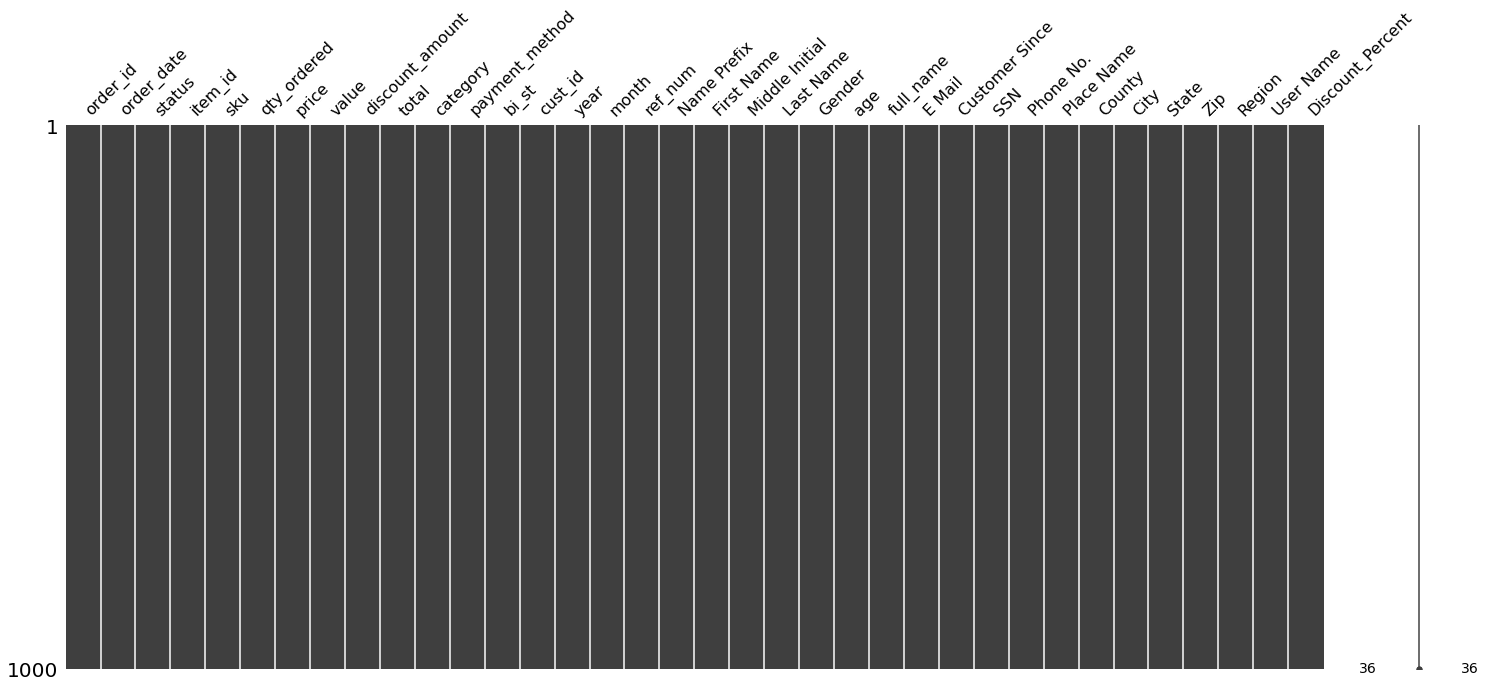

In [ ]:
%matplotlib inline
msno.matrix(df.sample(1000))

---
Queremos saber cuáles son las categorías de productos que posee el dataset, para ello:

In [ ]:
lista_categorias = pd.Series(df['category'].unique().tolist())
lista_categorias

0          Men's Fashion
1      Mobiles & Tablets
2              Computing
3             Appliances
4          Home & Living
5        Women's Fashion
6        Health & Sports
7      Beauty & Grooming
8             Superstore
9                 Others
10         Entertainment
11               Soghaat
12           Kids & Baby
13                 Books
14    School & Education
dtype: object

##<u>**Feature Engineering - Reducción de variables y dimensiones**</u>

Para iniciar el modelado (que desarrollaremos más adelante en el trabajo), es necesario en primera instancia realizar un proceso de dimensión de variables, eliminando aquellas que sean redundantes y otras que no aporten valor al modelado predictivo.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28



---
A simple vista, se observan claramente atributos que son redundantes o no serán necesarios para el modelado en cuestión, los cuáles se listan a continuación:

* sku --> Redundante con item_id, no se encuentra en el dataset la referencia asociada los códigos
* bi_st --> Tipo de facturación, dato del cliente que no interesa para el análisis
* year --> Redundante con order_date
* month --> Redundante con order_date
* ref_num --> Redundante con cust_id
* Name Prefix --> Referencia (Dr, Sr, Ing, etc) No interesa para el análisis
* First_Name --> No interesa para el análisis
* Middle_Initial --> No interesa para el análisis
* Last_Name --> No interesa para el análisis 
* full_name --> No interesa para el análisis
* Email --> No interesa para el análisis
* SSN--> Número de seguro social, no interesa para el análisis
* Phone_No --> No interesa para el análisis
* Place_Name --> Redundante con City
* User Name --> Redundante con cust_id

In [ ]:
Newdf = df.drop(columns = ['sku', 'bi_st','year','month','ref_num','Name Prefix','First Name','Middle Initial','Last Name','full_name','E Mail','SSN', 'Phone No. ','Place Name','User Name'])

In [ ]:
Newdf.head(10)

,order_id,order_date,status,item_id,qty_ordered,price,value,discount_amount,total,category,...,cust_id,Gender,age,Customer Since,County,City,State,Zip,Region,Discount_Percent
0,100354678,2020-10-01,received,574772.0,21.0,89.9,1887.9,0.0,1887.9,Men's Fashion,...,60124.0,F,43.0,8/22/2006,Harmon,Vinson,OK,73571,South,0.0
1,100354678,2020-10-01,received,574774.0,11.0,19.0,209.0,0.0,209.0,Men's Fashion,...,60124.0,F,43.0,8/22/2006,Harmon,Vinson,OK,73571,South,0.0
2,100354680,2020-10-01,complete,574777.0,9.0,149.9,1349.1,0.0,1349.1,Men's Fashion,...,60124.0,F,43.0,8/22/2006,Harmon,Vinson,OK,73571,South,0.0
3,100354680,2020-10-01,complete,574779.0,9.0,79.9,719.1,0.0,719.1,Men's Fashion,...,60124.0,F,43.0,8/22/2006,Harmon,Vinson,OK,73571,South,0.0
4,100367357,2020-11-13,received,595185.0,2.0,99.9,199.8,0.0,199.8,Men's Fashion,...,60124.0,F,43.0,8/22/2006,Harmon,Vinson,OK,73571,South,0.0
5,100367357,2020-11-13,received,595186.0,2.0,39.9,79.8,0.0,79.8,Men's Fashion,...,60124.0,F,43.0,8/22/2006,Harmon,Vinson,OK,73571,South,0.0
6,100367360,2020-11-13,order_refunded,595192.0,2.0,47.6,95.2,0.0,95.2,Mobiles & Tablets,...,60124.0,F,43.0,8/22/2006,Harmon,Vinson,OK,73571,South,0.0
7,100354677,2020-10-01,canceled,574769.0,2.0,49.0,98.0,0.0,98.0,Mobiles & Tablets,...,42485.0,M,28.0,2/4/1981,Bradford,Graham,FL,32042,South,0.0
8,100354677,2020-10-01,canceled,574770.0,2.0,135.0,270.0,0.0,270.0,Computing,...,42485.0,M,28.0,2/4/1981,Bradford,Graham,FL,32042,South,0.0
9,100354677,2020-10-01,canceled,574771.0,2.0,549.9,1099.8,0.0,1099.8,Appliances,...,42485.0,M,28.0,2/4/1981,Bradford,Graham,FL,32042,South,0.0


In [ ]:
Newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   qty_ordered       286392 non-null  float64
 5   price             286392 non-null  float64
 6   value             286392 non-null  float64
 7   discount_amount   286392 non-null  float64
 8   total             286392 non-null  float64
 9   category          286392 non-null  object 
 10  payment_method    286392 non-null  object 
 11  cust_id           286392 non-null  float64
 12  Gender            286392 non-null  object 
 13  age               286392 non-null  float64
 14  Customer Since    286392 non-null  object 
 15  County            286392 non-null  object 
 16  City              28

In [ ]:
Newdf.describe().round(2)

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,age,Zip,Discount_Percent
count,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00,286392.00
mean,741664.90,3.01,851.39,1737.27,131.16,1606.10,70048.02,46.49,49723.16,6.07
std,95746.03,4.57,1741.75,3587.80,370.39,3442.13,30243.86,16.67,27597.20,10.10
min,574769.00,1.00,0.00,0.00,0.00,0.00,4.00,18.00,210.00,0.00
25%,659684.50,2.00,49.90,123.60,0.00,119.80,56519.00,32.00,26571.75,0.00
50%,742309.00,2.00,119.00,330.00,0.00,303.60,74225.50,47.00,49316.00,0.00
75%,826124.25,3.00,950.00,1999.80,80.00,1819.90,92357.00,61.00,72645.00,11.00
max,905208.00,501.00,101262.59,202525.18,31220.25,202525.18,115326.00,75.00,99950.00,75.00




---

### Transformación de variables categóricas en númericas para su procesamiento

---



In [ ]:
# Codificaciones de variables

# Codificación de venta cancelada o no cancelada
Newdf['cancelado'] = np.where(Newdf['status']=='canceled',1,0)

# Codificación de las categorías
le = preprocessing.LabelEncoder()
le.fit(Newdf['category'])
# list(le.classes_)
# list(le.transform(Newdf['category']))
Newdf['categoria_codificada'] = le.transform(Newdf['category'])
# list(le.inverse_transform(Newdf['categoria_codificada']))

# Codificación de los medios de pago
le = preprocessing.LabelEncoder()
le.fit(Newdf['payment_method'])
Newdf['medio_pago_codificado'] = le.transform(Newdf['payment_method'])

# Codificación de las regiones
le = preprocessing.LabelEncoder()
le.fit(Newdf['Region'])
Newdf['region_codificada'] = le.transform(Newdf['Region'])

# Codificación de los estados
le = preprocessing.LabelEncoder()
le.fit(Newdf['State'])
Newdf['estado_codificado'] = le.transform(Newdf['State'])

Para la codificación de si está o no cancelada la órden, no usamos OneHotEncoder ya que nosotros hicimos una simplificación con los estados. Consideramos los "canceled" como "Cancelados" y el resto de estados como "NO Cancelados".

Es por ello que es más simple el código utilizando la función np.where()

In [ ]:
# Lista de posibles Estados:
lista_estados = pd.Series(df['status'].unique().tolist())
lista_estados

0           received
1           complete
2     order_refunded
3           canceled
4             refund
5                cod
6               paid
7         processing
8             closed
9            pending
10    pending_paypal
11    payment_review
12            holded
dtype: object

In [ ]:
NumericalData = Newdf.loc[:,['qty_ordered', 'price','Discount_Percent','categoria_codificada', 'medio_pago_codificado']]

NumericalData.head(10)

,qty_ordered,price,Discount_Percent,categoria_codificada,medio_pago_codificado
0,21.0,89.9,0.0,8,6
1,11.0,19.0,0.0,8,6
2,9.0,149.9,0.0,8,6
3,9.0,79.9,0.0,8,6
4,2.0,99.9,0.0,8,6
5,2.0,39.9,0.0,8,6
6,2.0,47.6,0.0,9,6
7,2.0,49.0,0.0,9,2
8,2.0,135.0,0.0,3,2
9,2.0,549.9,0.0,0,2


#<u>**Análisis exploratorio de datos teniendo en cuenta las preguntas de interés del cliente**</u>

---

**¿Cuál es la región con mayor participación en ventas online?**

---

Text(0.5, 1.0, 'Cantidad de Ventas por Región')

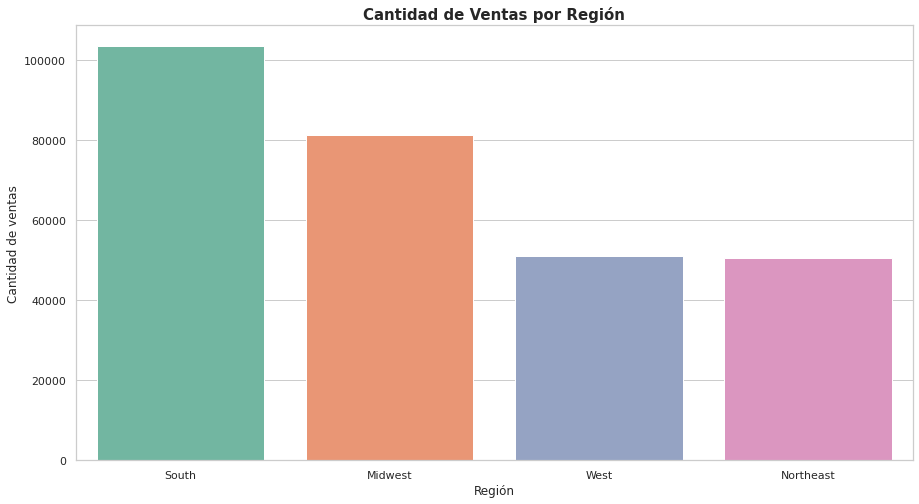

In [ ]:
NewBarPlot = df.groupby(['Region']).order_id.count()
df_regiones = pd.DataFrame({"Region": NewBarPlot.index, "Cantidad Ventas": NewBarPlot.values})

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Region', y='Cantidad Ventas', data= df_regiones, order=df_regiones.sort_values('Cantidad Ventas',ascending=False).Region , palette='Set2', errwidth='0')
ax.set(xlabel='Región', ylabel='Cantidad de ventas')
plt.title('Cantidad de Ventas por Región', fontsize= 15, fontweight='bold')

Agregamos una columna de período (año/mes) al dataset, para poder graficar en función de este dato

In [ ]:
from pandas.core.internals import concat
df['order_date']=pd.to_datetime(df['order_date']) # convierto columna Date en datatime
print(type(df.order_date[0]))

df['periodo'] = df.order_date.dt.strftime('%Y-%m')

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


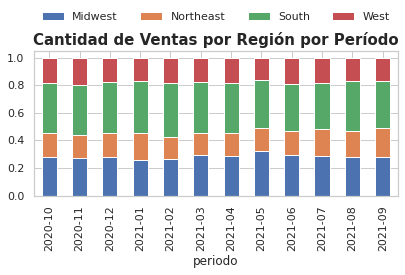

In [ ]:
x_var, y_var = "periodo", "Region" 
df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.plot.bar(stacked=True)
plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=2,
    frameon=False,
    ncol=4,
)
plt.title('Cantidad de Ventas por Región por Período', fontsize= 15, fontweight='bold')


plt.tight_layout()



---


Se identifica al área South USA cómo la región con mayor participación en órdenes on-line; seguido de Midwest

---



---

**¿La región/estado con mayor incremento en ventas online?**

---

Text(0.5, 1.0, 'Cantidad de Ventas por Región')

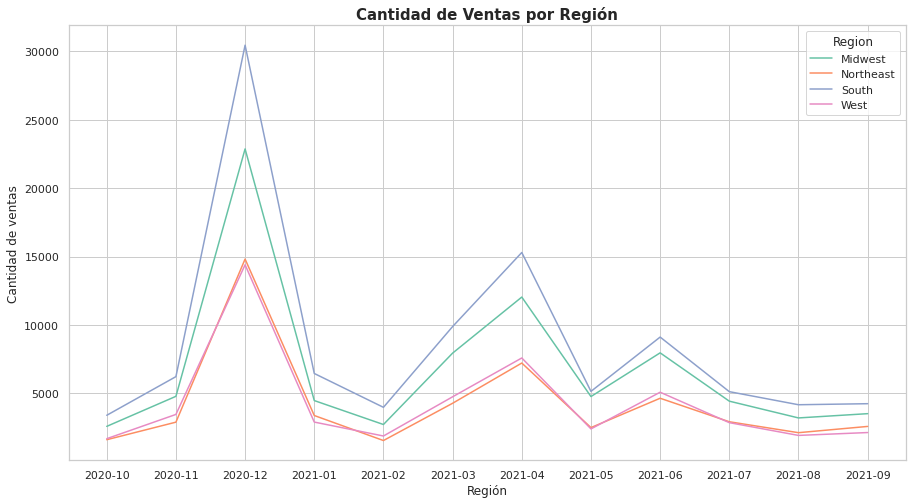

In [ ]:
region_periodo = df.groupby(by=['Region', 'periodo']).order_id.count()
df_region_periodo = pd.DataFrame(data={'Region':region_periodo.index.get_level_values(0),'Periodo':region_periodo.index.get_level_values(1), 'Cantidad Ventas': region_periodo.values})
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x='Periodo', y='Cantidad Ventas', hue='Region' ,data= df_region_periodo , palette='Set2')
ax.set(xlabel='Región', ylabel='Cantidad de ventas')
plt.title('Cantidad de Ventas por Región', fontsize= 15, fontweight='bold')

Text(0.5, 1.0, 'Monto total de Ventas por Región')

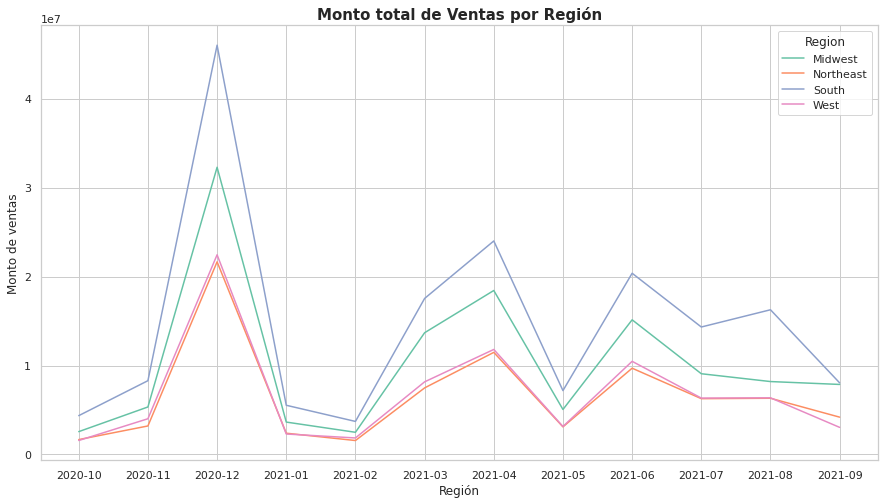

In [ ]:
region_periodo = df.groupby(by=['Region', 'periodo']).total.sum()
df_region_periodo = pd.DataFrame(data={'Region':region_periodo.index.get_level_values(0),'Periodo':region_periodo.index.get_level_values(1), 'Monto de Ventas': region_periodo.values})
df_region_periodo
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x='Periodo', y='Monto de Ventas', hue='Region' ,data= df_region_periodo , palette='Set2')
ax.set(xlabel='Región', ylabel='Monto de ventas')
plt.title('Monto total de Ventas por Región', fontsize= 15, fontweight='bold')



---


Analizando las gráficas anteriores, tanto en cantidad de ventas como en monto total de las mismas, vemos similares comportamientos para las diferentes regiones en dónde se comercializan productos.

Existen 2 picos bien marcados en los meses de Diciembre 2020 y Marzo/Abril 2022. Tendremos que ondar más adelante con detalles de estos comportamientos.

En la región South tenemos un aumento de las ventas en monto total, en el mes de Agosto 2021 que no se observa en otras regiones. También buscaremos más detalles al respecto.

---



---
**¿Cuáles son las categorías con tendencia a incrementar o disminuir su cantidad de ordenes online?**

---



Text(0.5, 1.0, 'Monto total de ventas por categoría y período')

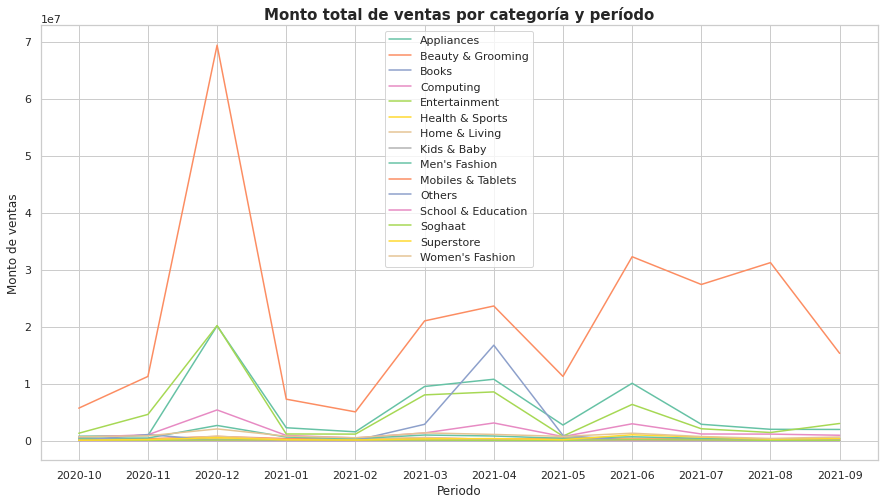

In [ ]:
categoria_periodo = df.groupby(by=['category', 'periodo']).total.sum()
df_categoria_periodo = pd.DataFrame(data={'Categoria':categoria_periodo.index.get_level_values(0),'Periodo':categoria_periodo.index.get_level_values(1), 'Monto de Ventas': categoria_periodo.values})
df_categoria_periodo
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x='Periodo', y='Monto de Ventas', hue='Categoria' ,data= df_categoria_periodo , palette='Set2')
ax.set(xlabel='Periodo', ylabel='Monto de ventas')
ax.legend(loc='best')
plt.title('Monto total de ventas por categoría y período', fontsize= 15, fontweight='bold')



---
Sin dudas, observando el gráfico, se deberá poner foco en la categoría Mobiles & Tablets la cuál es la dominante en sumatoria de ventas en comercio online. También habría que prestar especial atención a categorías Books, Entertainment y Men's Fashion, principalmente por los decrecimientos observados en las órdenes efectuadas. 

---



---

**¿Cómo es la situación de las órdenes de compra canceladas?¿Se podría identificar algún patrón al respecto?**

---

(-0.5, 3.5)

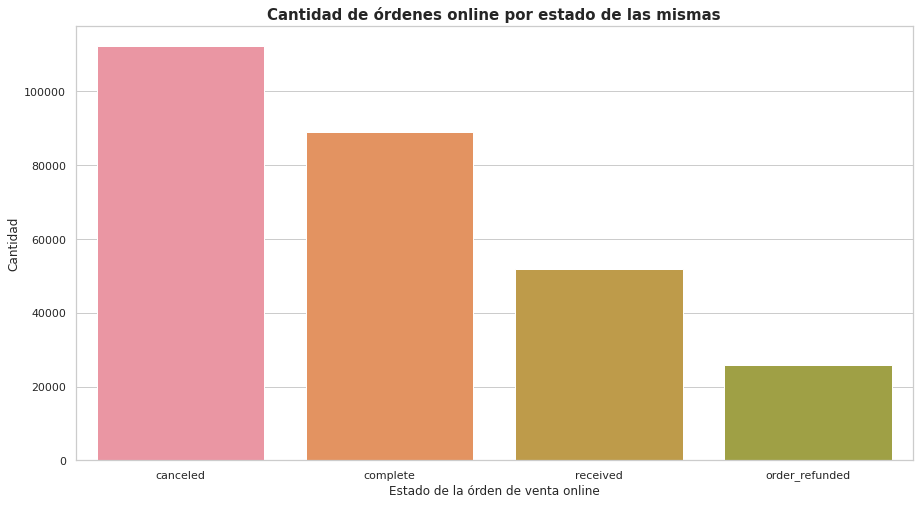

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
datos = df.groupby(['status']).total.count()
datos = pd.DataFrame({"Status": datos.index, "Cantidad": datos.values})
sns.barplot(x='Status', y='Cantidad', data= datos, order=datos.sort_values('Cantidad',ascending=False).Status)
ax.set_xlabel('Estado de la órden de venta online')
ax.set_ylabel('Cantidad')
ax.set_title(label='Cantidad de órdenes online por estado de las mismas', fontdict={'fontsize': 15, 'fontweight': 'bold'})

# Nos quedaremos con los 4 estados más importantes:
plt.xlim(-0.5, 3.5)

In [ ]:
total_ventas = df.order_id.count()
datos2 = df.groupby(['status']).total.count()/total_ventas*100
df_status = pd.DataFrame(data={"Estado":datos2.index, "% Participación": datos2.values.round(2)})
df_status_sorted = df_status.sort_values(by='% Participación', ascending=False)
df_status_sorted

,Estado,% Participación
0,canceled,39.17
3,complete,31.07
11,received,18.08
5,order_refunded,8.98
12,refund,1.33
2,cod,1.00
6,paid,0.26
1,closed,0.06
7,payment_review,0.02
8,pending,0.02


Filtramos y creamos un dataset solo con los pedidos cancelados, que lo usaremos más adelante en el desarrollo del trabajo

In [ ]:
#Seleccionar filas con pedidos cancelados

cancelado = df.loc[:, 'status'] == 'canceled'

df_cancelado = df.loc[cancelado]

df_cancelado.head(10)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,periodo
7,100354677,2020-10-01,canceled,574769.0,GFE_19_USBLEDLight,2.0,49.0,98.0,0.00000,98.00000,...,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000,2020-10
8,100354677,2020-10-01,canceled,574770.0,oasis_Kingston-32GB-DTIG4,2.0,135.0,270.0,0.00000,270.00000,...,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000,2020-10
9,100354677,2020-10-01,canceled,574771.0,Geepas_GSB5420,2.0,549.9,1099.8,0.00000,1099.80000,...,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000,2020-10
12,100403034,2020-12-24,canceled,656937.0,APPWES59CA4D59CB41A,2.0,254.8,509.6,79.61256,429.98744,...,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622559,2020-12
13,100403034,2020-12-24,canceled,656938.0,APPPHI5A09939191938,2.0,315.5,631.0,98.57834,532.42166,...,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622558,2020-12
14,100403034,2020-12-24,canceled,656939.0,HALSHO59F836EF959B9,2.0,69.8,139.6,21.80910,117.79090,...,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622564,2020-12
15,100403077,2020-12-24,canceled,657023.0,APPWES59CA4D59CB41A,2.0,254.8,509.6,79.61256,429.98744,...,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622559,2020-12
16,100403077,2020-12-24,canceled,657024.0,APPPHI5A09939191938,2.0,315.5,631.0,98.57834,532.42166,...,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622558,2020-12
17,100403077,2020-12-24,canceled,657025.0,HALSHO59F836EF959B9,2.0,69.8,139.6,21.80910,117.79090,...,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622564,2020-12
18,100403411,2020-12-24,canceled,657547.0,APPWES59CA4D59CB41A,2.0,254.8,509.6,79.61256,429.98744,...,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,15.622559,2020-12


In [ ]:
df_cancelado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112166 entries, 7 to 286385
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          112166 non-null  object        
 1   order_date        112166 non-null  datetime64[ns]
 2   status            112166 non-null  object        
 3   item_id           112166 non-null  float64       
 4   sku               112166 non-null  object        
 5   qty_ordered       112166 non-null  float64       
 6   price             112166 non-null  float64       
 7   value             112166 non-null  float64       
 8   discount_amount   112166 non-null  float64       
 9   total             112166 non-null  float64       
 10  category          112166 non-null  object        
 11  payment_method    112166 non-null  object        
 12  bi_st             112166 non-null  object        
 13  cust_id           112166 non-null  float64       
 14  year


##**Primer Insight de particular interés para el cliente: PEDIDOS CANCELADOS**
---
En la búsqueda de insights o patrones, se realizó un gráfico de barras en el cuál se agrupan la cantidad de pedidos online por estado de los mismos. Realmente llamó la atención que la categoría con mayor repeticiones sea "cancelado", casi por un 30% más que la categoría siguiente "completado" (que suponíamos por lógica sería la primer categoría).

Esta situación le resulto de particular interés al equipo de Data Science, por lo que se decidió compartir esta visualización al cliente, para conocer si se encontraban al tanto de tan alta tasa de cancelaciones. El cliente se encontró sumamente sorprendido con esta información y pidió ahondar especificamente en este rubro, dado que una orden de venta online genera una cantidad muy importante de información interna y procesos de validación, lo cuál resulta en erogaciones de dinero que se terminan perdiendo si la orden se cancela.

Por lo tanto, el equipo de científicos de datos dedicará una importante cantidad de recursos en ahondar sobre las órdenes de compra canceladas, de tal forma de identificar patrones que permitan clusterizar las órdenes de venta que se cancelan, a la vez que evaluar la posibilidad de crear un algoritmo que prediga cuando una orden será cancelada.

---



Text(0.5, 1.0, 'Cantidad de órdenes online canceladas por región')

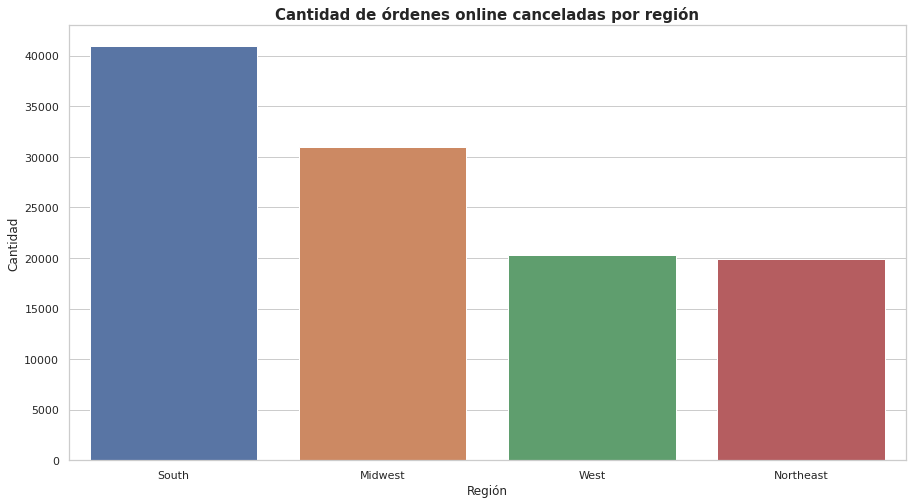

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
datos = df_cancelado.groupby(['Region']).total.count()
datos = pd.DataFrame({"Region": datos.index, "Cantidad": datos.values})
sns.barplot(x='Region', y='Cantidad', data= datos, order=datos.sort_values('Cantidad',ascending=False).Region)
ax.set_xlabel('Región')
ax.set_ylabel('Cantidad')
ax.set_title(label='Cantidad de órdenes online canceladas por región', fontdict={'fontsize': 15, 'fontweight': 'bold'})



---

Tal cómo se puede observar, la cantidad de órdenes canceladas por región replica el comportamiento de cantidad de órdenes por región; por lo cuál no se puede extraer un insight significativo.

Dado ello, creemos importante hacer la subdivisión de órdenes canceladas por estado, de forma de identificar patrones de cancelaciones de órdenes online

---



Text(0.5, 1.0, 'Cantidad de órdenes online canceladas por estado')

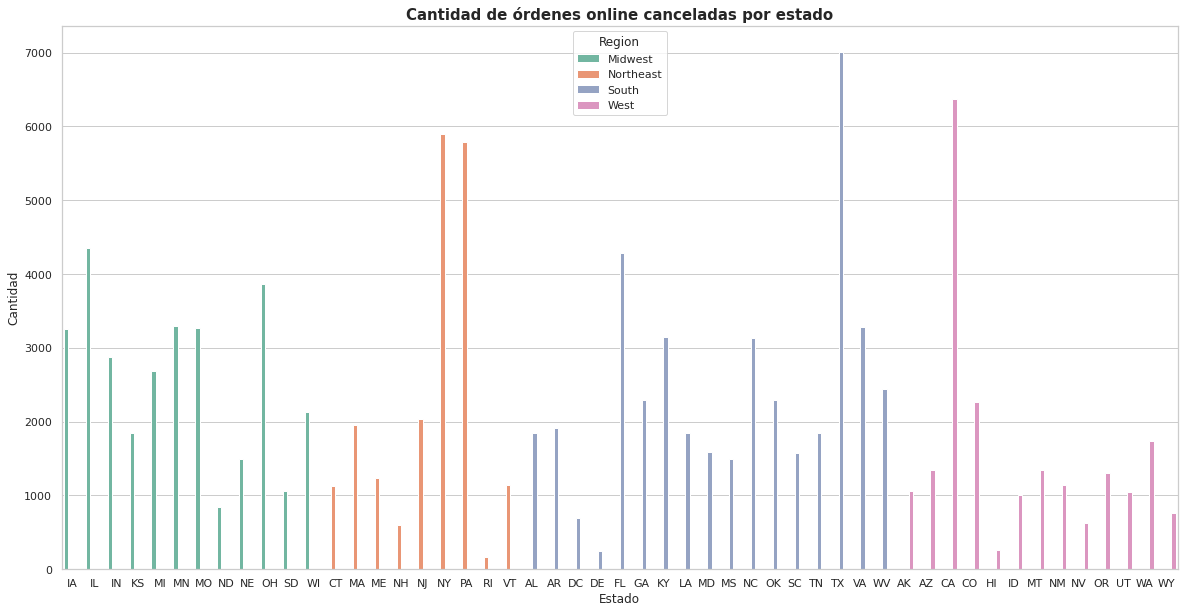

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
datos = df_cancelado.groupby(['Region','State'] ).total.count()
df_estado_region = pd.DataFrame(data={'Region':datos.index.get_level_values(0),'Estado':datos.index.get_level_values(1), 'Cantidad Cancelaciones': datos.values})
sns.barplot(x='Estado', y='Cantidad Cancelaciones', hue='Region', data= df_estado_region, palette='Set2', errwidth='0')
ax.set(xlabel='Estado', ylabel='Cantidad')
plt.title('Cantidad de órdenes online canceladas por estado', fontsize= 15, fontweight='bold')



---

Este gráfico plantea información más determinante a la hora de encontrar motivos de esta situación de cancelaciones, ya que visibiliza estados que en el gráfico de cancelaciones por región no aparecerían, tal es el caso de CA (California, región West) o NY (New York, Northeast)

---



Text(0.5, 1.0, 'Órdenes canceladas por método de pago')

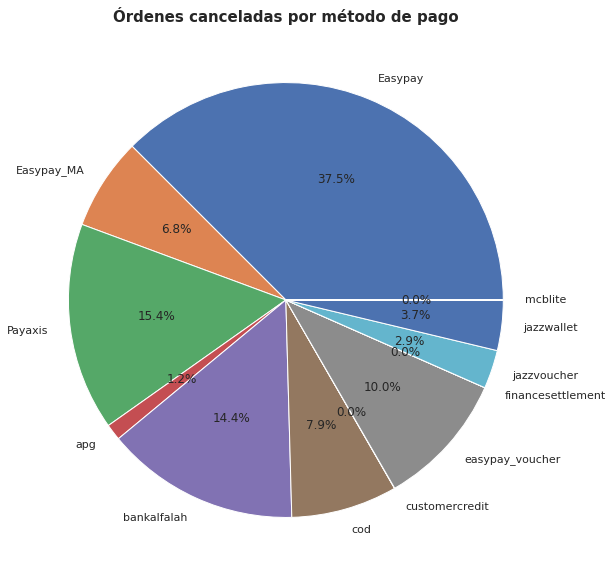

In [ ]:
CountCancelado = df_cancelado.groupby(['payment_method'])['payment_method'].count()
fig, ax = plt.subplots(figsize = (20,10))
ax.pie(CountCancelado, labels = CountCancelado.index, autopct='%1.1f%%')
ax.set_title('Órdenes canceladas por método de pago', fontdict={'fontsize': 15, 'fontweight': 'bold'})


---
Este gráfico de torta también nos muestra información interesante, dado que permite apreciar los métodos de pago con mayor cantidad de cancelaciones. Si observamos el gráfico de torta de órdenes totales por método de pago, podemos observar un 36% de participación de COD, mientras que este gráfico demuestra que la participación del método de pago COD en las cancelaciones es del 8%. Por otra parte, el pago con bankaifalah tiene una participación global del 8% y en las cancelaciones ocupa el 14,4% del total; Payaxis tiene una relación de 10,8% y 15,4%.



---




Text(0.5, 1.0, 'Órdenes canceladas por categoría de producto')

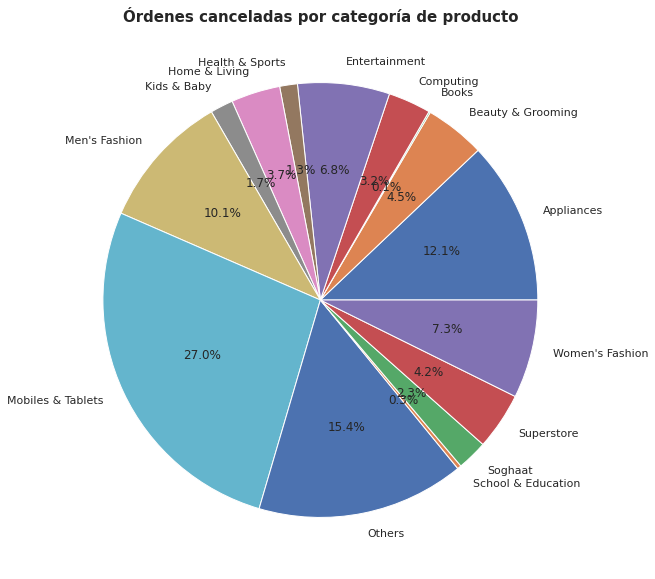

In [ ]:
CountCancelado = df_cancelado.groupby(['category'])['payment_method'].count()
fig, ax = plt.subplots(figsize = (20,10))
ax.pie(CountCancelado, labels = CountCancelado.index, autopct='%1.1f%%')
ax.set_title('Órdenes canceladas por categoría de producto', fontdict={'fontsize': 15, 'fontweight': 'bold'})

Text(0.5, 1.0, 'Histograma, agrupación de monto total de órdenes canceladas')

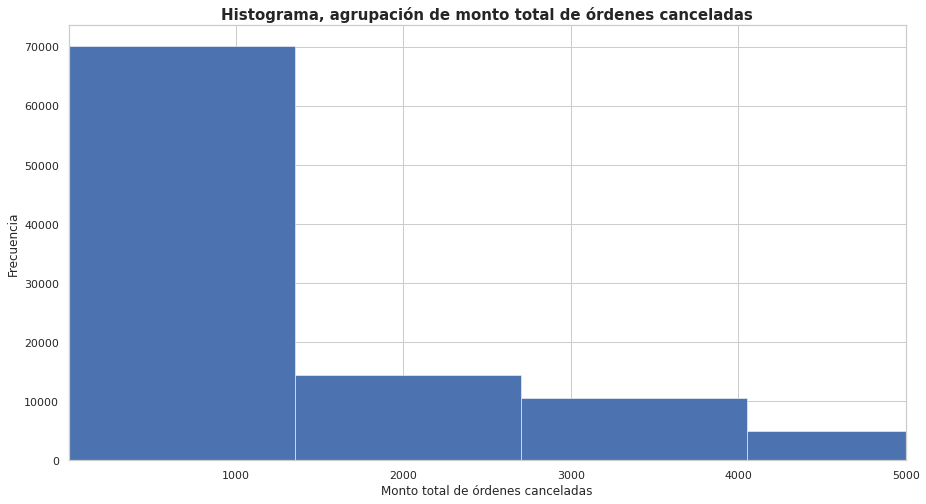

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_theme(style='darkgrid', palette='deep', context='notebook')
sns.histplot(data=df_cancelado, x=df_cancelado['total'],  shrink=1, alpha=1, bins=150, stat='count', legend=True)
ax.set(xlabel='Monto total de órdenes canceladas', ylabel='Frecuencia')
ax.set(xlim = (1, 5000) )
plt.title('Histograma, agrupación de monto total de órdenes canceladas', fontsize= 15, fontweight='bold')



---
Tal cómo se observa en el histograma, casi el 90% de las órdenes canceladas fueron órdenes de un valor inferior a los 2500 USD


---





---
Concluímos que las cancelaciones no tiene relación con la región, ya que se observa la misma distribución que en las ventas (que tiene sentido ya que a mayor venta, mayor son la cantidad de ventas que podrían ser canceladas).
Sí observamos alguna tendencia por estado, con 4 estados muy presentes en esta categoría, pertenecientes a 3 zonas del país.
También detectamos medios de pago con mayor tendencia a la cancelación y para finalizar vemos que por amplia diferencia, se cancelan las órdenes de bajo costo.

---



---

**¿Existen factores externos que podrían incidir en la cancelación de órdenes de venta?** 

---





---

Para responder esta pregunta de interés del cliente, se propone buscar contexto o situaciones que generen un incremento o decrecimiento de órdenes canceladas, de tal forma de identificar potenciales patrones.

De allí viene la propuesta de llamadas a una API que se visualiza a continuación: Se realizarán consultas a una API que proporciona información de valor intradiario de acciones de las 5 empresas más importantes del rubro tecnológico.

Se investigará una potencial correlación entre caída/subida/tendencia de valor de acciones de empresas de rubro tecnológico y cantidad de órdenes canceladas.

---



###API AlphaVantage

Esta API permite solo 5 llamadas a la misma por minuto y un máximo de 500 diarias (en su versión gratuita). Por ello, decidimos analizar las acciones de las 5 empresas más importantes del rubro tecnológico.

In [ ]:
symbols = ['MSFT', 'IBM', 'AAPL', 'GOOG', 'TSLA']
dataApi = []
  
# Hacemos las llamadas a las API y cargamos las respuestas en un array
for i in range(len(symbols)):
  symbol = symbols[i]
  r = requests.get(url=f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&datatype=json&outputsize=full&apikey=OE37J3AEVOY7TKDI')
  dataApi.append(r)

AllDf = pd.DataFrame()

# Concatenamos las respuestas de las API, y armamos un DataFrame
for i in range(len(dataApi)):
  jsondata=json.loads(dataApi[i].text)
  dfToConcat = pd.DataFrame.from_dict(jsondata['Time Series (Daily)'], orient='index')
  AllDf = pd.concat([AllDf, dfToConcat], axis=1)

AllDf = AllDf.drop(columns = ['5. adjusted close', '7. dividend amount','8. split coefficient'])

# Cambiamos el nombre a todas las columnas del DataFrame
columnsNames = []
columnsNamesCat = ['open', 'high', 'low', 'close', 'volume']
for i in range(len(dataApi)):
  for j in range(len(columnsNamesCat)):
    cn = f'{symbols[i]}_{columnsNamesCat[j]}'
    columnsNames.append(cn)

AllDf.columns = columnsNames

# Resultado
AllDf.head(10000000)

,MSFT_open,MSFT_high,MSFT_low,MSFT_close,MSFT_volume,IBM_open,IBM_high,IBM_low,IBM_close,IBM_volume,...,GOOG_open,GOOG_high,GOOG_low,GOOG_close,GOOG_volume,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_volume
2023-02-17,259.39,260.09,256.0,258.06,30000055,134.5,135.58,133.89,135.02,3466184,...,95.07,95.75,93.45,94.59,31095067,199.985,208.44,197.5,208.31,213738549
2023-02-16,264.02,266.74,261.9,262.15,29603616,135.57,135.9672,134.59,135.0,2965495,...,95.54,97.88,94.97,95.78,35642106,210.78,217.65,201.84,202.04,229586538
2023-02-15,268.32,270.73,266.18,269.32,28962163,135.2,136.445,135.07,136.4,2507004,...,94.74,97.34,94.36,97.1,37029885,211.755,214.66,206.11,214.24,182108581
2023-02-14,272.67,274.97,269.28,272.17,37047924,137.05,137.24,135.05,136.01,3202172,...,94.66,95.175,92.65,94.95,42513079,191.94,209.82,189.44,209.25,216455708
2023-02-13,267.64,274.6,267.15,271.32,44630921,136.0,137.39,135.85,137.35,4403015,...,95.01,95.35,94.05,95.0,43116559,194.415,196.3,187.61,194.64,172475452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,91.81,92.87,90.5,91.56,35083700,92.75,92.94,90.19,90.25,13737600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-04,92.31,92.75,90.31,91.75,27119700,94.44,94.44,90.0,91.56,16697600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-03,92.94,93.5,91.5,92.0,22258500,95.87,95.94,93.5,94.37,10369100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-02,92.75,94.5,91.94,92.56,23174500,96.75,96.81,93.69,94.81,11105400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




---

Con las llamadas y transformaciones de JSON a DataFrame realizadas, se obtuvo una tabla de 25 columnas y 3105 filas con información de valor de apertura, cierre, valor mínimo, máximo y volumen diario de las 5 empresas tecnológicas más representativas del mercado

---



### Merge - Fusión de DataFrames

In [ ]:
AllDf.head(5)

,MSFT_open,MSFT_high,MSFT_low,MSFT_close,MSFT_volume,IBM_open,IBM_high,IBM_low,IBM_close,IBM_volume,...,GOOG_open,GOOG_high,GOOG_low,GOOG_close,GOOG_volume,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_volume
2023-02-17,259.39,260.09,256.0,258.06,30000055,134.5,135.58,133.89,135.02,3466184,...,95.07,95.75,93.45,94.59,31095067,199.985,208.44,197.5,208.31,213738549
2023-02-16,264.02,266.74,261.9,262.15,29603616,135.57,135.9672,134.59,135.0,2965495,...,95.54,97.88,94.97,95.78,35642106,210.78,217.65,201.84,202.04,229586538
2023-02-15,268.32,270.73,266.18,269.32,28962163,135.2,136.445,135.07,136.4,2507004,...,94.74,97.34,94.36,97.1,37029885,211.755,214.66,206.11,214.24,182108581
2023-02-14,272.67,274.97,269.28,272.17,37047924,137.05,137.24,135.05,136.01,3202172,...,94.66,95.175,92.65,94.95,42513079,191.94,209.82,189.44,209.25,216455708
2023-02-13,267.64,274.6,267.15,271.32,44630921,136.0,137.39,135.85,137.35,4403015,...,95.01,95.35,94.05,95.0,43116559,194.415,196.3,187.61,194.64,172475452


In [ ]:
AllDf.shape

(5863, 25)

In [ ]:
AllDf2 = AllDf.reset_index()
StocksDf = AllDf2.rename(columns={'index':'order_date'})
StocksDf.head(5)

,order_date,MSFT_open,MSFT_high,MSFT_low,MSFT_close,MSFT_volume,IBM_open,IBM_high,IBM_low,IBM_close,...,GOOG_open,GOOG_high,GOOG_low,GOOG_close,GOOG_volume,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_volume
0,2023-02-17,259.39,260.09,256.0,258.06,30000055,134.5,135.58,133.89,135.02,...,95.07,95.75,93.45,94.59,31095067,199.985,208.44,197.5,208.31,213738549
1,2023-02-16,264.02,266.74,261.9,262.15,29603616,135.57,135.9672,134.59,135.0,...,95.54,97.88,94.97,95.78,35642106,210.78,217.65,201.84,202.04,229586538
2,2023-02-15,268.32,270.73,266.18,269.32,28962163,135.2,136.445,135.07,136.4,...,94.74,97.34,94.36,97.1,37029885,211.755,214.66,206.11,214.24,182108581
3,2023-02-14,272.67,274.97,269.28,272.17,37047924,137.05,137.24,135.05,136.01,...,94.66,95.175,92.65,94.95,42513079,191.94,209.82,189.44,209.25,216455708
4,2023-02-13,267.64,274.6,267.15,271.32,44630921,136.0,137.39,135.85,137.35,...,95.01,95.35,94.05,95.0,43116559,194.415,196.3,187.61,194.64,172475452


In [ ]:
NumericalData_withDate = Newdf.loc[:,['order_date','qty_ordered', 'price','Discount_Percent','categoria_codificada', 'medio_pago_codificado', 'cancelado']]

NumericalData_withDate.head(10)

,order_date,qty_ordered,price,Discount_Percent,categoria_codificada,medio_pago_codificado,cancelado
0,2020-10-01,21.0,89.9,0.0,8,6,0
1,2020-10-01,11.0,19.0,0.0,8,6,0
2,2020-10-01,9.0,149.9,0.0,8,6,0
3,2020-10-01,9.0,79.9,0.0,8,6,0
4,2020-11-13,2.0,99.9,0.0,8,6,0
5,2020-11-13,2.0,39.9,0.0,8,6,0
6,2020-11-13,2.0,47.6,0.0,9,6,0
7,2020-10-01,2.0,49.0,0.0,9,2,1
8,2020-10-01,2.0,135.0,0.0,3,2,1
9,2020-10-01,2.0,549.9,0.0,0,2,1


In [ ]:
MergedDF = pd.merge(NumericalData_withDate, StocksDf, on="order_date", how='left')

MergedDF.head(1000000)

,order_date,qty_ordered,price,Discount_Percent,categoria_codificada,medio_pago_codificado,cancelado,MSFT_open,MSFT_high,MSFT_low,...,GOOG_open,GOOG_high,GOOG_low,GOOG_close,GOOG_volume,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_volume
0,2020-10-01,21.0,89.9,0.0,8,6,0,213.49,213.99,211.32,...,1484.27,1499.04,1479.21,1490.09,1779497,440.76,448.88,434.42,448.16,50741454
1,2020-10-01,11.0,19.0,0.0,8,6,0,213.49,213.99,211.32,...,1484.27,1499.04,1479.21,1490.09,1779497,440.76,448.88,434.42,448.16,50741454
2,2020-10-01,9.0,149.9,0.0,8,6,0,213.49,213.99,211.32,...,1484.27,1499.04,1479.21,1490.09,1779497,440.76,448.88,434.42,448.16,50741454
3,2020-10-01,9.0,79.9,0.0,8,6,0,213.49,213.99,211.32,...,1484.27,1499.04,1479.21,1490.09,1779497,440.76,448.88,434.42,448.16,50741454
4,2020-11-13,2.0,99.9,0.0,8,6,0,216.36,217.42,214.16,...,1757.63,1781.04,1744.55,1777.02,1500574,410.85,412.5319,401.66,408.5,19830351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286387,2021-09-30,2.0,4419.9,0.0,0,0,0,285.71,287.83,281.62,...,2686.5,2711.8,2660.0,2665.31,1768199,781.0,789.1305,775.0,775.48,17955961
286388,2021-09-30,2.0,39.9,0.0,8,6,0,285.71,287.83,281.62,...,2686.5,2711.8,2660.0,2665.31,1768199,781.0,789.1305,775.0,775.48,17955961
286389,2021-09-30,2.0,40.0,0.0,14,6,0,285.71,287.83,281.62,...,2686.5,2711.8,2660.0,2665.31,1768199,781.0,789.1305,775.0,775.48,17955961
286390,2021-09-30,2.0,49.9,0.0,14,6,0,285.71,287.83,281.62,...,2686.5,2711.8,2660.0,2665.31,1768199,781.0,789.1305,775.0,775.48,17955961


Verificamos las dimensiones de los 3 dataset, para validar que hicimos correctamente el Merge

In [ ]:
print(NumericalData_withDate.shape)
print(AllDf.shape)
print(MergedDF.shape)

(286392, 7)
(5863, 25)
(286392, 32)


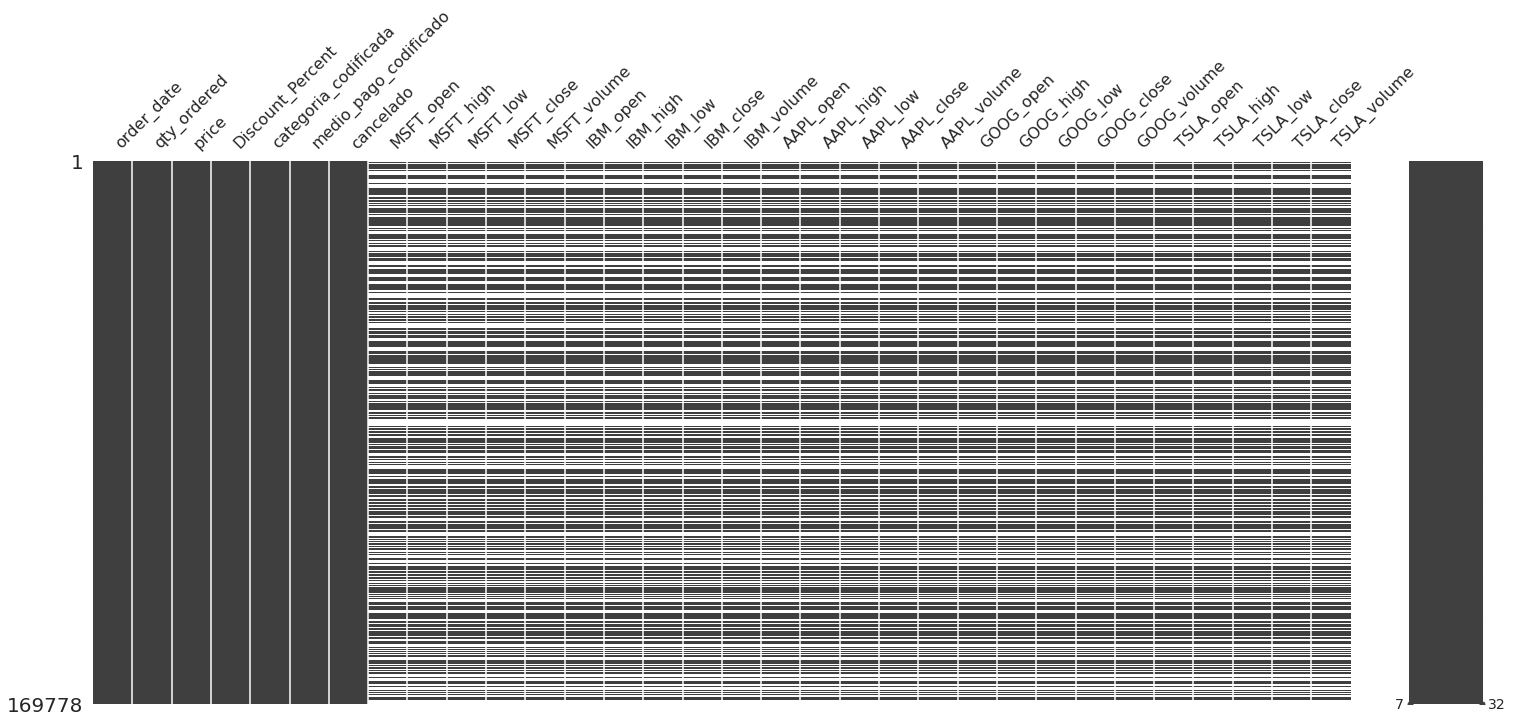

In [ ]:
%matplotlib inline
msno.matrix(MergedDF.sample(169778))



---
Los datos ausentes en las columnas asociadas a acciones están relacionados con fechas en dónde no hubo operación bursátil, ya sea por fines de semana o feriados nacionales / bancarios.


---



In [ ]:
MergedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286392 entries, 0 to 286391
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_date             286392 non-null  object 
 1   qty_ordered            286392 non-null  float64
 2   price                  286392 non-null  float64
 3   Discount_Percent       286392 non-null  float64
 4   categoria_codificada   286392 non-null  int64  
 5   medio_pago_codificado  286392 non-null  int64  
 6   cancelado              286392 non-null  int64  
 7   MSFT_open              169778 non-null  object 
 8   MSFT_high              169778 non-null  object 
 9   MSFT_low               169778 non-null  object 
 10  MSFT_close             169778 non-null  object 
 11  MSFT_volume            169778 non-null  object 
 12  IBM_open               169778 non-null  object 
 13  IBM_high               169778 non-null  object 
 14  IBM_low                169778 non-nu

In [ ]:
for i in range(7, len(MergedDF.columns)):
  ColumnName = MergedDF.columns[i]
  MergedDF[ColumnName] = MergedDF[ColumnName].astype(float)

In [ ]:
MergedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286392 entries, 0 to 286391
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_date             286392 non-null  object 
 1   qty_ordered            286392 non-null  float64
 2   price                  286392 non-null  float64
 3   Discount_Percent       286392 non-null  float64
 4   categoria_codificada   286392 non-null  int64  
 5   medio_pago_codificado  286392 non-null  int64  
 6   cancelado              286392 non-null  int64  
 7   MSFT_open              169778 non-null  float64
 8   MSFT_high              169778 non-null  float64
 9   MSFT_low               169778 non-null  float64
 10  MSFT_close             169778 non-null  float64
 11  MSFT_volume            169778 non-null  float64
 12  IBM_open               169778 non-null  float64
 13  IBM_high               169778 non-null  float64
 14  IBM_low                169778 non-nu

In [ ]:
from pandas.core.internals import concat
MergedDF['order_date']=pd.to_datetime(MergedDF['order_date']) # convierto columna Date en datatime
print(type(MergedDF.order_date[0]))

MergedDF['periodo_weekly'] = MergedDF.order_date.dt.strftime('%Y-%U')
MergedDF['periodo_monthly'] = MergedDF.order_date.dt.strftime('%Y-%m')

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
MergedDF.head(10)

,order_date,qty_ordered,price,Discount_Percent,categoria_codificada,medio_pago_codificado,cancelado,MSFT_open,MSFT_high,MSFT_low,...,GOOG_low,GOOG_close,GOOG_volume,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_volume,periodo_weekly,periodo_monthly
0,2020-10-01,21.0,89.9,0.0,8,6,0,213.49,213.99,211.32,...,1479.21,1490.09,1779497.0,440.76,448.8800,434.42,448.16,50741454.0,2020-39,2020-10
1,2020-10-01,11.0,19.0,0.0,8,6,0,213.49,213.99,211.32,...,1479.21,1490.09,1779497.0,440.76,448.8800,434.42,448.16,50741454.0,2020-39,2020-10
2,2020-10-01,9.0,149.9,0.0,8,6,0,213.49,213.99,211.32,...,1479.21,1490.09,1779497.0,440.76,448.8800,434.42,448.16,50741454.0,2020-39,2020-10
3,2020-10-01,9.0,79.9,0.0,8,6,0,213.49,213.99,211.32,...,1479.21,1490.09,1779497.0,440.76,448.8800,434.42,448.16,50741454.0,2020-39,2020-10
4,2020-11-13,2.0,99.9,0.0,8,6,0,216.36,217.42,214.16,...,1744.55,1777.02,1500574.0,410.85,412.5319,401.66,408.50,19830351.0,2020-45,2020-11
5,2020-11-13,2.0,39.9,0.0,8,6,0,216.36,217.42,214.16,...,1744.55,1777.02,1500574.0,410.85,412.5319,401.66,408.50,19830351.0,2020-45,2020-11
6,2020-11-13,2.0,47.6,0.0,9,6,0,216.36,217.42,214.16,...,1744.55,1777.02,1500574.0,410.85,412.5319,401.66,408.50,19830351.0,2020-45,2020-11
7,2020-10-01,2.0,49.0,0.0,9,2,1,213.49,213.99,211.32,...,1479.21,1490.09,1779497.0,440.76,448.8800,434.42,448.16,50741454.0,2020-39,2020-10
8,2020-10-01,2.0,135.0,0.0,3,2,1,213.49,213.99,211.32,...,1479.21,1490.09,1779497.0,440.76,448.8800,434.42,448.16,50741454.0,2020-39,2020-10
9,2020-10-01,2.0,549.9,0.0,0,2,1,213.49,213.99,211.32,...,1479.21,1490.09,1779497.0,440.76,448.8800,434.42,448.16,50741454.0,2020-39,2020-10


### Correlacción stock assets - cancelación de ventas 



---
Una vez finalizado con las tareas de Data Wrangling, nos encontramos con un dataset que contiene información referida a las cancelaciones de órdenes de venta de una empresa de e-commerce y los datos de las acciones de las empresas más importantes del rubro IT.

Lo que se buscará entonces es identificar una potencial correlación entre cancelaciones de órdenes de venta y situación de tendencia conjunta de caída o alza de valor de acciones de empresas IT. 

Si se logra identificar esta relación entre variables aparentemente independientes, se buscará encontrar causalidad, esto es, una dependencia relativamente directa entre una variable y la otra.



---





---

Iniciando con esta búsqueda de correlación, es que se elaboran gráficos de series temporales para visibilizar la situación de las acciones y las órdenes canceladas, de manera de identificar patrones de comportamiento de primera instancia.

---



In [ ]:
mpl.style.use('bmh')

(0.0, 11.0)

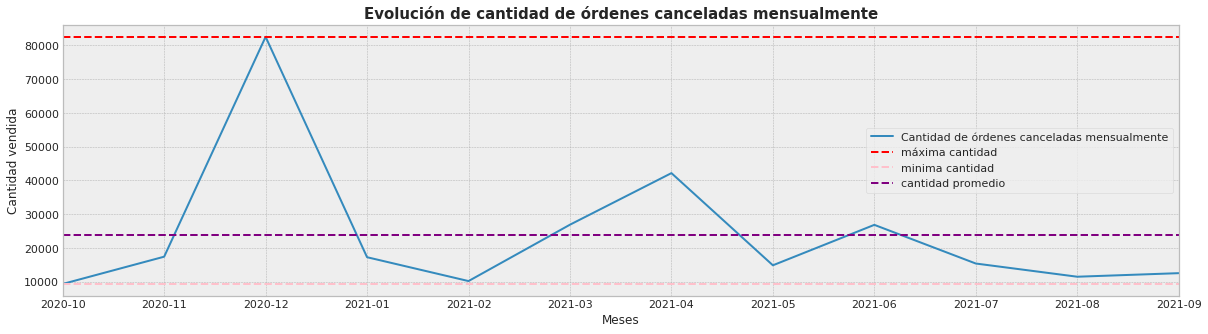

In [ ]:
#Construcción de variable dependiente
y = MergedDF.groupby([MergedDF.periodo_monthly]).cancelado.count()
#Construcción de líneas horizontales de referencia
maximo_precio = y.max()
minimo_precio = y.min()
precio_medio = y.mean()

#Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(y, label='Cantidad de órdenes canceladas mensualmente')
ax.axhline(maximo_precio, color='red', linestyle='--', label = 'máxima cantidad')
ax.axhline(minimo_precio, color='pink', linestyle='--', label = 'minima cantidad')
ax.axhline(precio_medio, color='purple', linestyle='--', label = 'cantidad promedio')
ax.set_xlabel('Meses')
ax.set_ylabel('Cantidad vendida')
ax.set_title(label='Evolución de cantidad de órdenes canceladas mensualmente', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y.index[0], y.index[-1])



---

Se observa un importante pico de cantidad de órdenes canceladas en el mes de diciembre del año 2020, a la vez que máximos relativos en los meses de abril 2021 y junio 2021. A partir de junio 2021, la tendencia de órdenes que se cancelan es decreciente.

---



(0.0, 11.0)

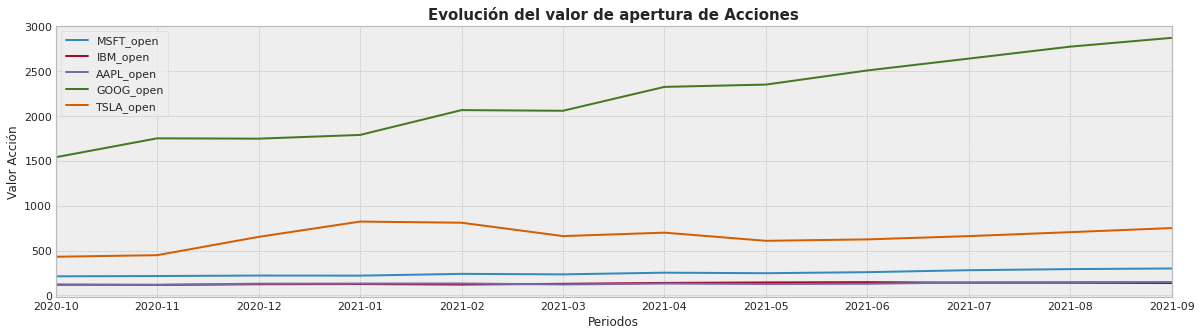

In [ ]:
#Construcción de variable dependiente
y1 = MergedDF.groupby(['periodo_monthly'])['MSFT_open'].mean()
y2 = MergedDF.groupby(['periodo_monthly'])['IBM_open'].mean()
y3 = MergedDF.groupby(['periodo_monthly'])['AAPL_open'].mean()
y4 = MergedDF.groupby(['periodo_monthly'])['GOOG_open'].mean()
y5 = MergedDF.groupby(['periodo_monthly'])['TSLA_open'].mean()

x = y1.index
dio = y.mean()

# #Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(x, y1, label='MSFT_open')
ax.plot(x, y2, label='IBM_open')
ax.plot(x, y3, label='AAPL_open')
ax.plot(x, y4, label='GOOG_open')
ax.plot(x, y5, label='TSLA_open')
ax.set_xlabel('Periodos')
ax.set_ylabel('Valor Acción')
ax.set_title(label='Evolución del valor de apertura de Acciones', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y1.index[0], y1.index[-1])



---
Se observa una tendencia generalizada creciente del valor de apertura de las acciones de las principales compañías tecnológicas.

No obstante, los elevados valores de las acciones de Google y Tesla distorsionan los ejes de referencia, no permitiendo el gráfico analizar con detenimiento los valores de apertura de acciones de Apple, Microsoft e IBM, por lo que se graficarán aparte.


---



(0.0, 11.0)

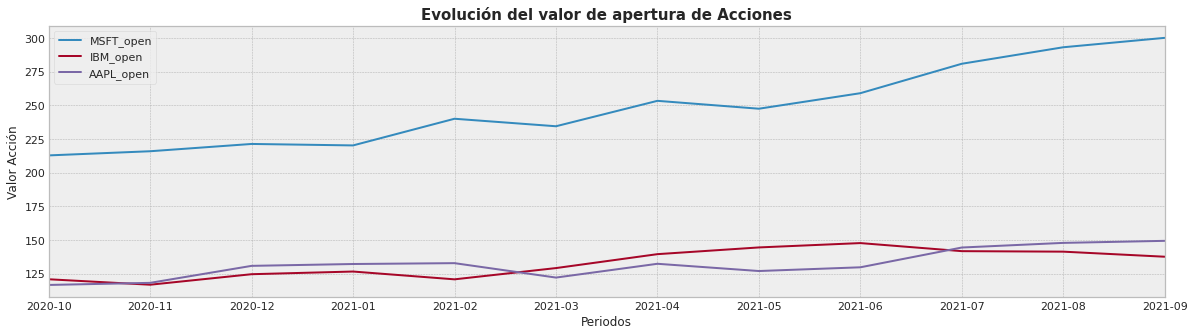

In [ ]:
#Construcción de variable dependiente
y1 = MergedDF.groupby(['periodo_monthly'])['MSFT_open'].mean()
y2 = MergedDF.groupby(['periodo_monthly'])['IBM_open'].mean()
y3 = MergedDF.groupby(['periodo_monthly'])['AAPL_open'].mean()

x = y1.index


# #Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(x, y1, label='MSFT_open')
ax.plot(x, y2, label='IBM_open')
ax.plot(x, y3, label='AAPL_open')
ax.set_xlabel('Periodos')
ax.set_ylabel('Valor Acción')
ax.set_title(label='Evolución del valor de apertura de Acciones', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y1.index[0], y1.index[-1])

(0.0, 11.0)

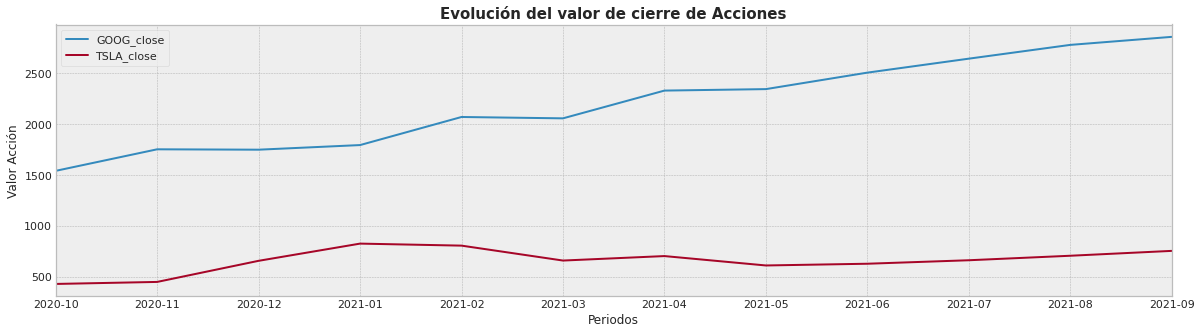

In [ ]:
#Construcción de variable dependiente
y4 = MergedDF.groupby(['periodo_monthly'])['GOOG_close'].mean()
y5 = MergedDF.groupby(['periodo_monthly'])['TSLA_close'].mean()

x = y1.index

# #Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(x, y4, label='GOOG_close')
ax.plot(x, y5, label='TSLA_close')
ax.set_xlabel('Periodos')
ax.set_ylabel('Valor Acción')
ax.set_title(label='Evolución del valor de cierre de Acciones', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y1.index[0], y1.index[-1])

(0.0, 11.0)

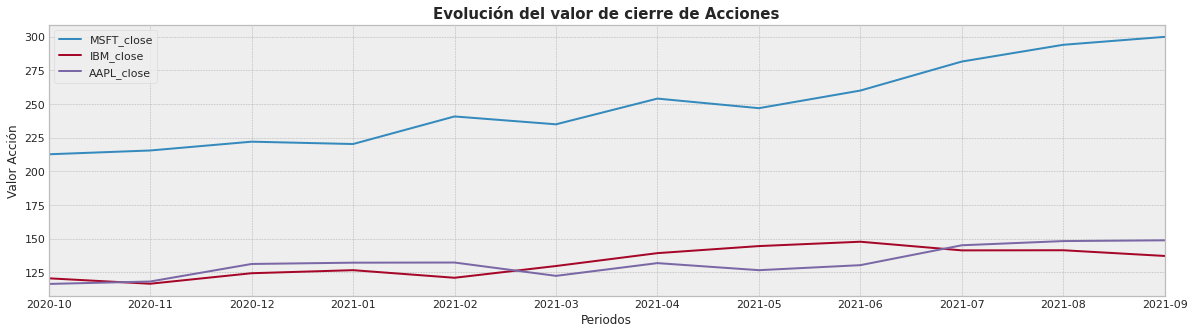

In [ ]:
#Construcción de variable depenclosete
y1 = MergedDF.groupby(['periodo_monthly'])['MSFT_close'].mean()
y2 = MergedDF.groupby(['periodo_monthly'])['IBM_close'].mean()
y3 = MergedDF.groupby(['periodo_monthly'])['AAPL_close'].mean()

x = y1.index


# #Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(x, y1, label='MSFT_close')
ax.plot(x, y2, label='IBM_close')
ax.plot(x, y3, label='AAPL_close')
ax.set_xlabel('Periodos')
ax.set_ylabel('Valor Acción')
ax.set_title(label='Evolución del valor de cierre de Acciones', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y1.index[0], y1.index[-1])

(0.0, 11.0)

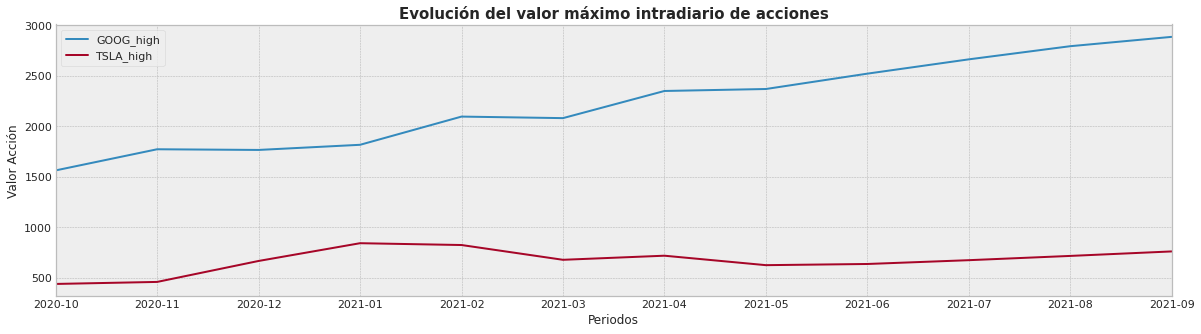

In [ ]:
#Construcción de variable dependiente
y4 = MergedDF.groupby(['periodo_monthly'])['GOOG_high'].mean()
y5 = MergedDF.groupby(['periodo_monthly'])['TSLA_high'].mean()

x = y1.index

# #Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(x, y4, label='GOOG_high')
ax.plot(x, y5, label='TSLA_high')
ax.set_xlabel('Periodos')
ax.set_ylabel('Valor Acción')
ax.set_title(label='Evolución del valor máximo intradiario de acciones', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y1.index[0], y1.index[-1])

(0.0, 11.0)

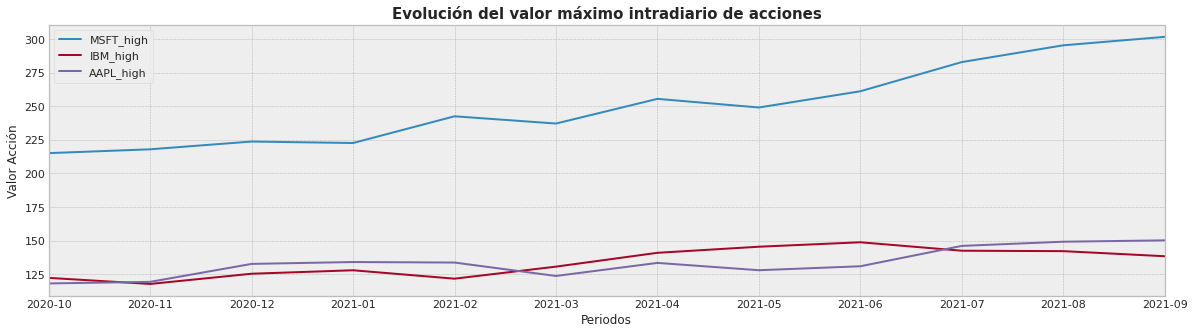

In [ ]:
#Construcción de variable dependiente
y1 = MergedDF.groupby(['periodo_monthly'])['MSFT_high'].mean()
y2 = MergedDF.groupby(['periodo_monthly'])['IBM_high'].mean()
y3 = MergedDF.groupby(['periodo_monthly'])['AAPL_high'].mean()

x = y1.index


# #Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(x, y1, label='MSFT_high')
ax.plot(x, y2, label='IBM_high')
ax.plot(x, y3, label='AAPL_high')
ax.set_xlabel('Periodos')
ax.set_ylabel('Valor Acción')
ax.set_title(label='Evolución del valor máximo intradiario de acciones', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y1.index[0], y1.index[-1])

(0.0, 11.0)

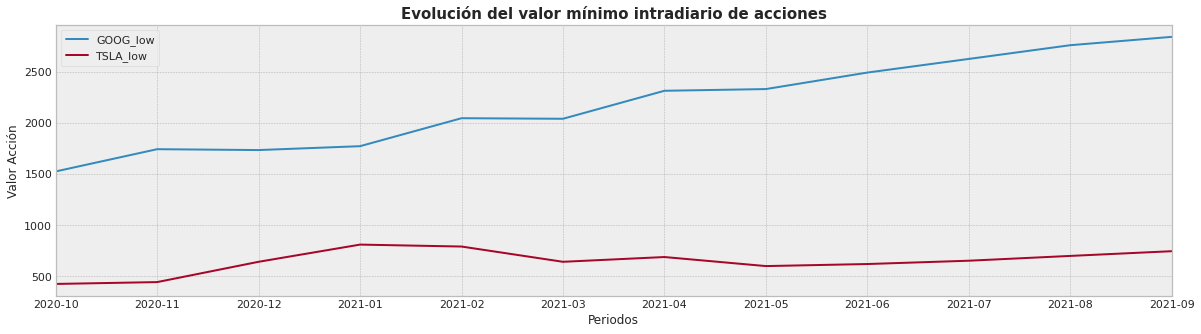

In [ ]:
#Construcción de variable dependiente
y4 = MergedDF.groupby(['periodo_monthly'])['GOOG_low'].mean()
y5 = MergedDF.groupby(['periodo_monthly'])['TSLA_low'].mean()

x = y1.index

# #Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(x, y4, label='GOOG_low')
ax.plot(x, y5, label='TSLA_low')
ax.set_xlabel('Periodos')
ax.set_ylabel('Valor Acción')
ax.set_title(label='Evolución del valor mínimo intradiario de acciones', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y1.index[0], y1.index[-1])

(0.0, 11.0)

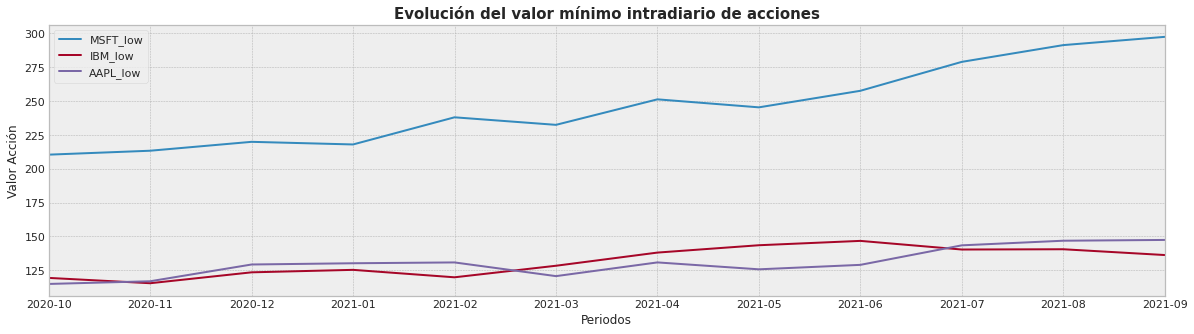

In [ ]:
#Construcción de variable dependiente
y1 = MergedDF.groupby(['periodo_monthly'])['MSFT_low'].mean()
y2 = MergedDF.groupby(['periodo_monthly'])['IBM_low'].mean()
y3 = MergedDF.groupby(['periodo_monthly'])['AAPL_low'].mean()

x = y1.index


# #Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(x, y1, label='MSFT_low')
ax.plot(x, y2, label='IBM_low')
ax.plot(x, y3, label='AAPL_low')
ax.set_xlabel('Periodos')
ax.set_ylabel('Valor Acción')
ax.set_title(label='Evolución del valor mínimo intradiario de acciones', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y1.index[0], y1.index[-1])

(0.0, 11.0)

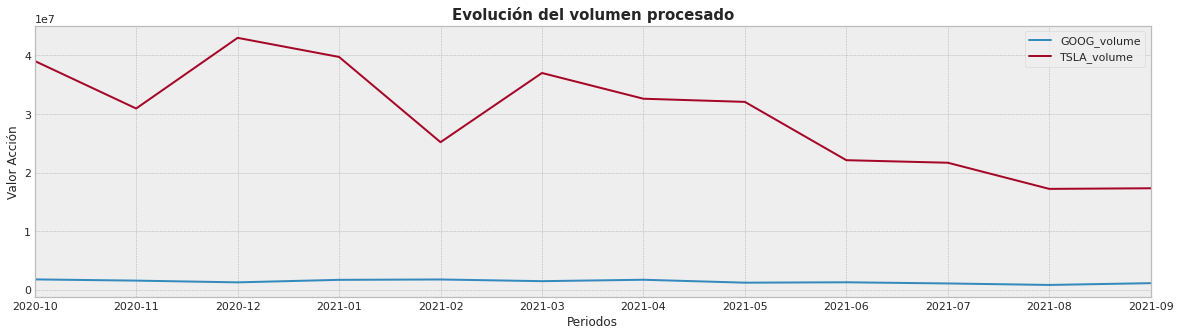

In [ ]:
#Construcción de variable dependiente
y4 = MergedDF.groupby(['periodo_monthly'])['GOOG_volume'].mean()
y5 = MergedDF.groupby(['periodo_monthly'])['TSLA_volume'].mean()

x = y1.index

# #Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(x, y4, label='GOOG_volume')
ax.plot(x, y5, label='TSLA_volume')
ax.set_xlabel('Periodos')
ax.set_ylabel('Valor Acción')
ax.set_title(label='Evolución del volumen procesado', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y1.index[0], y1.index[-1])

(0.0, 11.0)

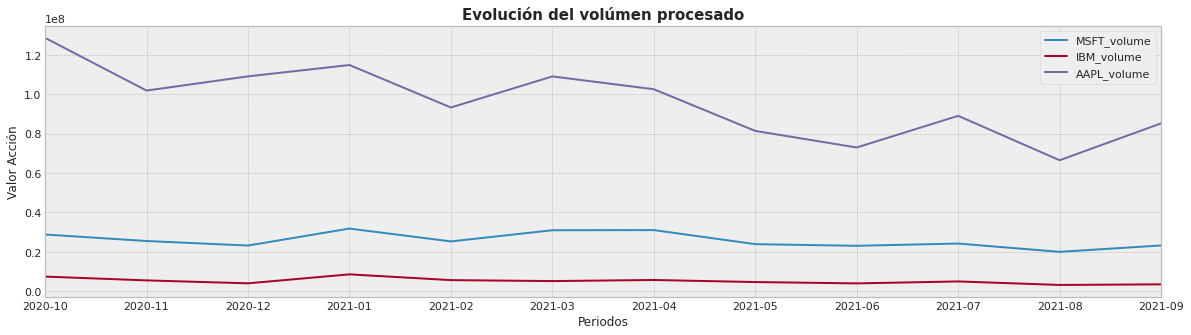

In [ ]:
#Construcción de variable dependiente
y1 = MergedDF.groupby(['periodo_monthly'])['MSFT_volume'].mean()
y2 = MergedDF.groupby(['periodo_monthly'])['IBM_volume'].mean()
y3 = MergedDF.groupby(['periodo_monthly'])['AAPL_volume'].mean()

x = y1.index


# #Elaboración de gráfico de líneas
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(x, y1, label='MSFT_volume')
ax.plot(x, y2, label='IBM_volume')
ax.plot(x, y3, label='AAPL_volume')
ax.set_xlabel('Periodos')
ax.set_ylabel('Valor Acción')
ax.set_title(label='Evolución del volúmen procesado', fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.legend(loc='best')
ax.set_xlim(y1.index[0], y1.index[-1])


---

En primera instancia, no se observa una correlación directa al análizar cantidad de órdenes canceladas mensualmente con variables de referencia promedio de las principales compañías tecnológicas que cotizan en bolsa: Los valores de apertura, cierre, máximo, mínimo (intradiarios) promedio mensual así cómo también el volumen intradiario promedio mensual siguen patrones de crecimiento y decrecimiento que visualmente no se encuentran relacionados con los meses dónde mayor cantidad de cancelaciones hubo (DIC20 - MAY21 y JUN21). Habría que hacer un análisis más exhaustivo de estos meses en particular y la evolución intradiaria / intersemanal de los valores bursátiles mencionados para identificar potenciales tendencias de correlación y causalidad. 

---



---

### Análisis de correlacción entre variables

---



In [ ]:
import statsmodels.formula.api as sm

model1 = 'cancelado~MSFT_open + IBM_open + AAPL_open + GOOG_open + TSLA_open'
lm1   = sm.ols(formula = model1, data = MergedDF).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              cancelado   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     659.9
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:38:26   Log-Likelihood:            -1.1709e+05
No. Observations:              169778   AIC:                         2.342e+05
Df Residuals:                  169772   BIC:                         2.343e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0138      0.036      0.385      0.7

In [ ]:
model2 = 'cancelado~MSFT_high + IBM_high + AAPL_high + GOOG_high + TSLA_high'
lm2   = sm.ols(formula = model2, data = MergedDF).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              cancelado   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     679.5
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:38:27   Log-Likelihood:            -1.1704e+05
No. Observations:              169778   AIC:                         2.341e+05
Df Residuals:                  169772   BIC:                         2.342e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0568      0.036     -1.578      0.1

In [ ]:
model3 = 'cancelado~MSFT_low + IBM_low + AAPL_low + GOOG_low + TSLA_low'
lm3  = sm.ols(formula = model3, data = MergedDF).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              cancelado   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     738.2
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:38:27   Log-Likelihood:            -1.1690e+05
No. Observations:              169778   AIC:                         2.338e+05
Df Residuals:                  169772   BIC:                         2.339e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2687      0.035      7.743      0.0

In [ ]:
model4 = 'cancelado~MSFT_close + IBM_close + AAPL_close + GOOG_close + TSLA_close'
lm4   = sm.ols(formula = model4, data = MergedDF).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              cancelado   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     676.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:38:27   Log-Likelihood:            -1.1705e+05
No. Observations:              169778   AIC:                         2.341e+05
Df Residuals:                  169772   BIC:                         2.342e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1814      0.036      5.092      0.0

In [ ]:
model5 = 'cancelado~MSFT_volume + IBM_volume + AAPL_volume + GOOG_volume + TSLA_volume'
lm5   = sm.ols(formula = model5, data = MergedDF).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:              cancelado   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     261.9
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          7.54e-280
Time:                        12:38:27   Log-Likelihood:            -1.1807e+05
No. Observations:              169778   AIC:                         2.362e+05
Df Residuals:                  169772   BIC:                         2.362e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3654      0.004     82.585      

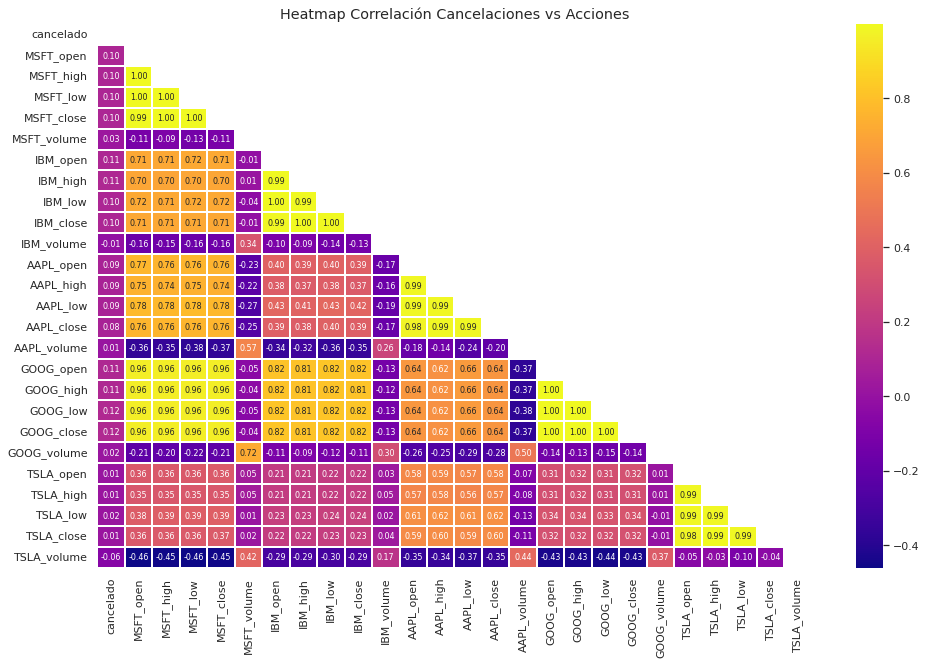

In [ ]:
#Heatmap correlación de variables
NumericalData_heatmap = MergedDF.drop(['order_date','qty_ordered', 'price', 'Discount_Percent', 'categoria_codificada', 'medio_pago_codificado'],axis=1)	

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(NumericalData_heatmap.corr(),dtype = bool))
sns.heatmap(NumericalData_heatmap.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Heatmap Correlación Cancelaciones vs Acciones')
plt.show()



---

Los análisis OLS de regresión son contundentes: no existe correlación entre las variables asociadas; no se puede determinar una relación  entre cancelaciones de órdenes y valores bursátiles de apertura, cierre, máximo, mínimo y volumen intradiario de las principales compañías tecnológicas que cotizan en bolsa.

En base a lo fundamentado, se descarta el insight.
<br>



---





---

**¿Se podrían encontrar patrones de cancelación de órdenes de venta?**

---





---

Teniendo en cuenta la enorme cantidad de órdenes de compra canceladas y el importante gasto administrativo que esto genera, con 0 ingresos, es que se propone modelar un algoritmo predictivo que permita clasificar las órdenes ingresadas al sistema, con el objetivo de que el mismo identifique órdenes de venta que por sus características tenderían a ser canceladas.

De esta manera, si el algoritmo tiene una precisión dentro del objetivo, se obtendría un importante ahorro al no tener en cuenta o no dar ingreso al circuito administrativo de órdenes que posteriormente se cancelarían.


---





---


#**PCA**

A fin de intentar generar un algoritmo de clasificación que no demande tanto tiempo ni recursos, se construye un modelado de PCA para analizar si existe la posibilidad de reducir dimensiones, utilizando las componentes principales que afecten en mayor medida la varianza del dataset, en lugar de las variables numéricas y categóricas transformadas en numéricas analizadas anteriormente.


---



In [ ]:
y = Newdf['cancelado']
x = NumericalData

x_std = StandardScaler().fit_transform(x)

# Calculamos la matriz de covarianza
print('NumPy covariance matrix: \n%s' %np.cov(x_std.T))

# Calculamos los autovalores y autovectores de la matriz y los mostramos
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

NumPy covariance matrix: 
[[ 1.00000349 -0.10374881  0.07369727  0.06821881 -0.07522144]
 [-0.10374881  1.00000349  0.05346216 -0.08643504 -0.00397405]
 [ 0.07369727  0.05346216  1.00000349 -0.09423114 -0.20985527]
 [ 0.06821881 -0.08643504 -0.09423114  1.00000349 -0.00618065]
 [-0.07522144 -0.00397405 -0.20985527 -0.00618065  1.00000349]]
Eigenvectors 
[[-0.28870046  0.55555017 -0.17770668 -0.28218453  0.70484628]
 [-0.09873153 -0.60371881 -0.11733267  0.49647438  0.60458409]
 [-0.68441749 -0.10234173  0.71947875 -0.04589376 -0.03664631]
 [ 0.19043247  0.55025528  0.30855441  0.75180869  0.02307523]
 [ 0.6342021  -0.11676     0.58463482 -0.32643918  0.3685029 ]]

Eigenvalues 
[1.25947985 1.18254941 0.7621459  0.92575476 0.87008755]
Autovalores en orden descendiente:
1.2594798485617589
1.1825494130006506
0.9257547555927285
0.8700875462372484
0.7621458952568003


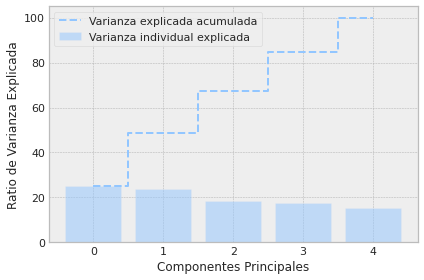

In [ ]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
x = range(5)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))
    plt.bar(x, var_exp, alpha=0.5, align='center', label='Varianza individual explicada')
    plt.step(x, cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

Porcentaje de varianza explicada por cada componente
[0.25189509 0.23650906 0.1851503  0.1740169  0.15242865]


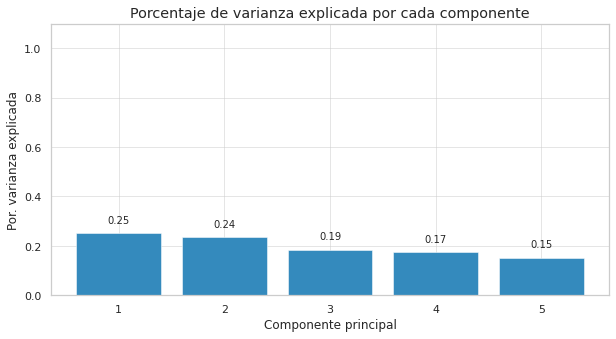

In [ ]:
# Preprocesado y modelado
datos = NumericalData
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1, height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');



---
Cómo se puede observarse en los gráficos de barra obtenidos, no tendría mucho sentido plantear un sistema de reducción de dimensionalidad, dado que quitando la componente principal con menor indicencia en la varianza del conjunto de datos, estaríamos perdiendo un 13%; de quitar las dos componentes principales de menor incidencia, la pérdida sería del 30%. Por este motivo expuesto, es que se decide elaborar un árbol de decisión para predecir nuevas órdenes de venta, teniendo en cuenta todas las variables de la matriz NumericalData cómo datos de entrenamiento y test, a la vez que la columna "cancelado" (definida en 1 cómo orden cancelada y 0 cómo orden no cancelada) cómo target.  

---



#**Varclus en Python**
A través del uso de esta librería, intentaremos hacer una reducción de variables del dataset, más allá de lo que ya hicimos manualmente, desde el conocimiento del negocio.

In [ ]:
Newdf_varnum = Newdf.loc[:,['item_id', 'qty_ordered', 'price', 'value', 'discount_amount', 'total', 'cust_id', 'age', 'Zip', 'Discount_Percent','cancelado', 'categoria_codificada', 'medio_pago_codificado', 'region_codificada', 'estado_codificado']]
Newdf_varnum.drop('cancelado',axis=1,inplace=True)
Newdf_varnum_vc = VarClusHi(Newdf_varnum,maxeigval2=1,maxclus=None)
Newdf_varnum_vc.varclus()


In [ ]:
Newdf_varnum_vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,5,3.124058,0.998596,0.624812
1,1,3,1.413849,0.999774,0.471283
2,2,3,1.458075,0.908252,0.486025
3,3,2,1.209855,0.790145,0.604927
4,4,1,1.000000,0.000000,1.000000


In [ ]:
Newdf_varnum_vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,qty_ordered,0.008852,0.009165,1.000316
1,0,price,0.915703,0.011567,0.085283
2,0,value,0.970827,0.014120,0.029590
3,0,discount_amount,0.289512,0.088365,0.779356
4,0,total,0.939165,0.017108,0.061894
5,1,item_id,0.706541,0.011748,0.296948
6,1,cust_id,0.706535,0.013994,0.297630
7,1,age,0.000773,0.000039,0.999266
8,2,Zip,0.638023,0.000066,0.362001
9,2,region_codificada,0.539757,0.000246,0.460357


In [ ]:
Newdf_varnum_final = Newdf.loc[:,['price', 'value', 'discount_amount', 'total', 'medio_pago_codificado', 'item_id', 'cust_id', 'Discount_Percent']]
Newdf_varnum_final.head(10)

,price,value,discount_amount,total,medio_pago_codificado,item_id,cust_id,Discount_Percent
0,89.9,1887.9,0.0,1887.9,6,574772.0,60124.0,0.0
1,19.0,209.0,0.0,209.0,6,574774.0,60124.0,0.0
2,149.9,1349.1,0.0,1349.1,6,574777.0,60124.0,0.0
3,79.9,719.1,0.0,719.1,6,574779.0,60124.0,0.0
4,99.9,199.8,0.0,199.8,6,595185.0,60124.0,0.0
5,39.9,79.8,0.0,79.8,6,595186.0,60124.0,0.0
6,47.6,95.2,0.0,95.2,6,595192.0,60124.0,0.0
7,49.0,98.0,0.0,98.0,2,574769.0,42485.0,0.0
8,135.0,270.0,0.0,270.0,2,574770.0,42485.0,0.0
9,549.9,1099.8,0.0,1099.8,2,574771.0,42485.0,0.0




---


#**Modelado de Decision Tree**

---



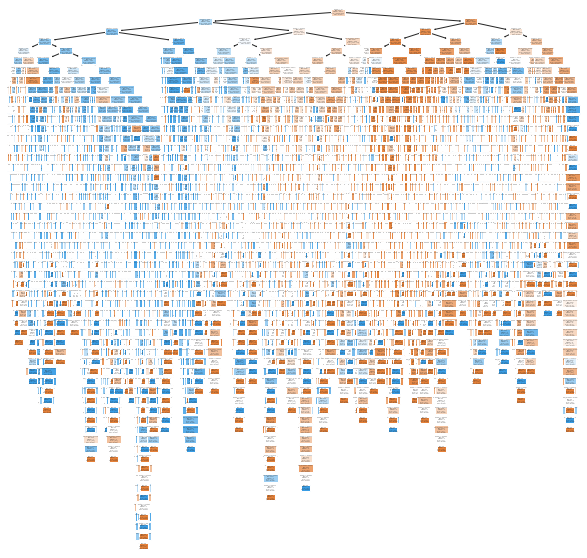

In [ ]:
y = Newdf['cancelado']
x = Newdf_varnum_final

# Separamos en entrenamiento/test en razon 70/30 %
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(x_train, y_train)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf,feature_names=Newdf.status,
                     class_names= Newdf.status,
                     filled=True)

In [ ]:
preds = pd.Series(model.predict(x_test))

cuenta_noCancelados = (preds.values == 0).sum()
cuenta_cancelados = (preds.values == 1).sum()

print('Cuenta compras canceladas: ', cuenta_cancelados)
print('Cuenta compras no canceladas: ', cuenta_noCancelados)

Cuenta compras canceladas:  33825
Cuenta compras no canceladas:  52093


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

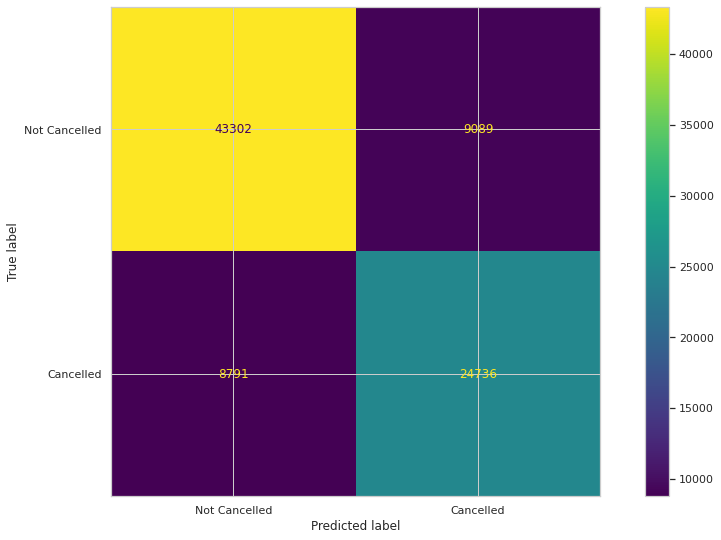

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(model, x_test, y_test, display_labels=['Not Cancelled', 'Cancelled'])

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.7918945971740496

In [ ]:
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa 

(0.7312934220251294, 0.8312441210911254)

In [ ]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.7377934202284726, 0.8265160046572885)

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     52391
           1       0.73      0.74      0.73     33527

    accuracy                           0.79     85918
   macro avg       0.78      0.78      0.78     85918
weighted avg       0.79      0.79      0.79     85918



In [ ]:
# Predicción de un caso

print(model.predict([[47.6,	95.2,	0.0,	95.2,	1, 595192.0, 60124.0, 0.0]]))

print(model.predict([[166.5,	333.0,	0.00000,	333.00000,	1,	574775.0,	53620.0,	0.000000]]))


[1]
[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"




---
El árbol de decisión modelado tiene en cuenta variables numéricas cómo ser la cantidad ordenada, precio de venta, descuentos así cómo también variables originalmente categóricas transformadas a numérico, cómo ser categoría y métodos de pago. 

Se transformó la columna de datos "status" (originalmente variable categórica) en numérica tomando valor 1 si la orden fue cancelada y valor 0 si la orden no fue cancelada.

Luego de generado y entrenado el método de clasificación propuesto, se utilizo el 30% del dataset para testear el mismo, observándose la capacidad de predicción del mismo en la matriz de confusión.

Se calcularon métricas de accuracy, precision, sensibilidad, especificidad y f1 para evaluar el modelo; arrojando valores aceptables de predicción de órdenes canceladas y no canceladas. Por último, se tomaron ejemplos puntuales para testear la predicción del modelo.


---





---
Al analizar el modelado propuesto, tanto la matriz de confusión como las métricas nos brindan información contundente para determinar si lo planteado se encuentra en una situación de underfitting o overfitting.

La exactitud del modelado, es decir la proporción entre lo predicho y la totalidad de los casos arroja un coeficiente de 0.7918, el cuál refleja que el modelo se adapta relativamente bien a nuevos valores (los proporcionados por el dataset de test); aunque se podría mejorar dado que no predice correctamente cel 20.82% de los nuevos datos ingresados.


Contemplando las métricas de precisión, la precisión positiva y negativa arrojan porcentuales de 73% y 83%; por lo que hay una aceptable rango de predicción teniendo en cuenta los falsos positivos y negativos. El modelo clasifica en forma correcta los nuevos datos ingresados.

A la hora de hablar del recall de sensibilidad y especificidad, los coeficientes obtenidos son 0.74 y 0.83, lo que consideramos como valores aceptables, aunque se podría mejorar el recall de sensibilidad, o la capacidad de identificar los verdaderos positivos que en nuestro caso serían las órdenes predichas cómo canceladas y efectivamente canceladas en el test set.

Por último, el F1 score arroja coeficientes de 0.83 para los casos no cancelados y 0.74 para los cancelados, lo que sugiere poca presencia de falsos positivos y falsos negativos. No obstante, entendemos que el recall podría mejorarse, especialmente en el aspecto de predecir correctamente las órdenes que por regla del modelo se cancelarán, lo que termina siendo la finalidad última del modelado predictivo.

Probablemente nos encontremos en un caso de underfitting, dado que el modelo encuentra cierta dificultad en encontrar patrones para predecir órdenes de compra que se cancelarán. No sería un caso de grave sub-ajuste dado que todas las métricas arrojan resultados superiores al 73% pero quizás habría que revisar los outliers y variables innecesarias, ajustar algún parámetro del árbol de decisión o probar con otro modelado de mayor complejidad.




---



# **Alternativa de modelado de clasificación predictiva, Bayes Naive Classifier a partir de teorema de Bayes**

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
# Preparación de datos de entrada, utilizando Feature Selectión con SelectKBest
y = Newdf['cancelado']
x = Newdf_varnum_final


best=SelectKBest(k=5)
x_new = best.fit_transform(x, y)
x_new.shape
selected = best.get_support(indices=True)
print(f'Las caracerísticas que mas aportan al modelo de clasificación son las siguientes: {x.columns[selected]}')

Las caracerísticas que mas aportan al modelo de clasificación son las siguientes: Index(['qty_ordered', 'price', 'Discount_Percent', 'categoria_codificada',
       'medio_pago_codificado'],
      dtype='object')


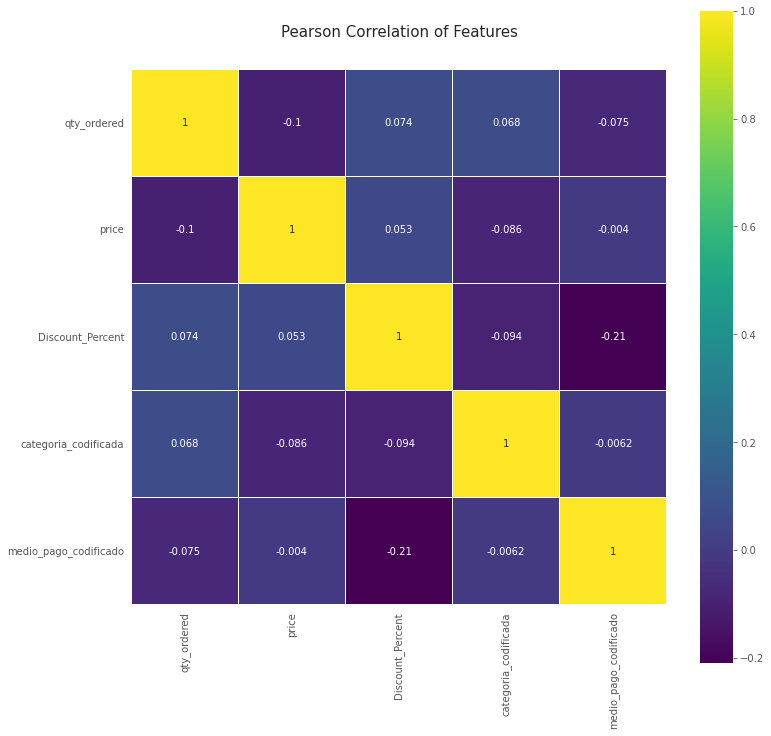

In [ ]:
#Visualización del grado de correlación entre las características seleccionadas
used_features = x.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(x[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
#Formulación del modelo Gaussian Naive Bayes con SKLearn
y = Newdf['cancelado']
x = Newdf_varnum_final

# Separamos en entrenamiento/test en razon 70/30 %
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)


# Llamada al clasificador
gnb = GaussianNB()
# Entrenamiento
gnb.fit(
    x_train[used_features].values,
    y_train
)
y_pred = gnb.predict(x_test[used_features])
 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(x_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(x_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.69
Precisión en el set de Test: 0.69


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


<Figure size 720x432 with 0 Axes>

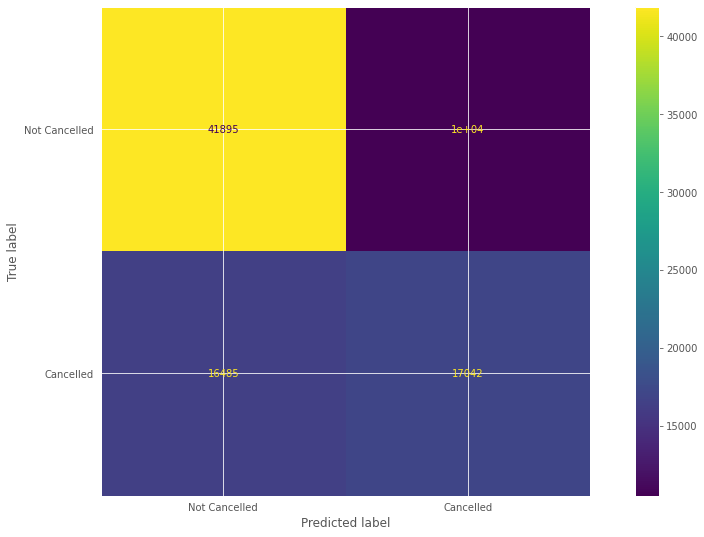

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(gnb, x_test, y_test, display_labels=['Not Cancelled', 'Cancelled'])

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.6859680160152704

In [ ]:
precision_positiva = metrics.precision_score(y_test, y_pred, pos_label=1)
precision_negativa = metrics.precision_score(y_test, y_pred, pos_label=0)
precision_positiva, precision_negativa 

(0.6188539472728594, 0.7176258992805755)

In [ ]:
recall_sensibilidad = metrics.recall_score(y_test, y_pred, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, y_pred, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.5083067378530737, 0.7996602469889866)

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))


---
Se propuso una alternativa al modelo de clasificación a partir de árbol de decisión; con lo cuál realizamos un modelado de clasificación a partir del Teorema de Bayes, el cuál relaciona probabilidades condicionales de eventos. El modelado generativo utilizado se denomina Gaussian Naive Bayes, el cuál asume distribución gaussiana a la vez que independencia de las características seleccionadas.

A la hora de iniciar el modelado, se realizó una feature selection utilizando Select K Best, el cuál analiza y selecciona características con mejores índices "k". El procesado del feature selection nos arrojó 5 características que resultaron las más adecuadas a utilizar, con lo cuál se analizó la correlación entre las mismas para ratificar o refutar el feature selection seleccionado.

Luego de generado y entrenado el método de clasificación propuesto, se utilizo el 30% del dataset para testear, observándose la capacidad de predicción del modelado a partir de las métricas construidas y la matriz de confusión.

Se calcularon métricas de accuracy, precision, sensibilidad, especificidad y f1 para evaluar el modelo.

---

---
Al analizar el modelado de clasificación a partir de Gaussian Naive Bayes, tanto la matriz de confusión como las métricas nos brindan información contundente: El modelado no presenta una exactitud que consideramos aceptable; todas las métricas presentaron valores inferiores al modelado de clasificación a partir de árbol de decisión.

Claramente nos encontramos en un caso de underfitting dado que el modelo encuentra dificultad para encontrar patrones y predecir órdenes que a futuro se cancelarán. Teniendo en cuenta las propuestas de modelado de clasificación realizadas, sugerimos avanzar en el moldeado y corrección de modelo de clasificación a partir de árbol de decisión.



---

# **Validación cruzada**

---



La validación cruzada (cross-validation en inglés) es una técnica de evaluación de modelos de aprendizaje automático que se utiliza para estimar la precisión de un modelo en una muestra de datos. La idea detrás de la validación cruzada es simple: en lugar de utilizar una sola partición de los datos para entrenamiento y otra para pruebas, se dividen los datos en varias particiones y se realizan varios entrenamientos y pruebas, de tal manera que cada partición de los datos se utilice una sola vez para pruebas.

La validación cruzada es útil porque permite obtener una estimación más precisa de la precisión del modelo en datos nuevos. Si se utiliza una sola partición de los datos para entrenamiento y pruebas, es posible que el modelo se ajuste demasiado bien a esos datos, lo que puede llevar a una sobreestimación de la precisión. Al utilizar varias particiones de los datos para entrenamiento y pruebas, se minimiza este riesgo y se obtiene una estimación más precisa de la precisión del modelo en datos nuevos.


In [ ]:
#Validación de modelado de árbol de decisión

y = Newdf['cancelado']
x = Newdf_varnum_final
dt = DecisionTreeClassifier()

# Uso de 10 fold de validaciones cruzadas para evaluar el modelo
scores = cross_val_score(dt, X, y, cv=10)

# Puntuación promedio de precisión
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.08)


In [ ]:
y = Newdf['cancelado']
x = Newdf_varnum_final
gnb = GaussianNB()

# Uso de 10 fold de validaciones cruzadas para evaluar el modelo
scores = cross_val_score(gnb, x, y, cv=10)

# Puntuación promedio de precisión
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.08)




---

# **Conclusiones finales del proyecto**

---



En conclusión, este proyecto de análisis de datos se enfoca en el e-commerce y la tendencia alcista de compras en línea. La pandemia y el aumento exponencial de personas con acceso a internet han dado lugar a un aumento en las compras en línea. Una importante empresa de e-commerce de Estados Unidos ha recopilado información sobre las órdenes de compra generadas por sus clientes en línea para ser analizadas por el equipo de Data Science. La tarea del equipo consistió en trabajar con los datos proporcionados, realizar una limpieza adecuada y proporcionar visualizaciones que respondan a las preguntas específicas del cliente.

El objetivo final es ayudar a la empresa a tomar decisiones informadas y maximizar sus márgenes de utilidad. Para lograr esto, el equipo de Data Science realizó un proceso de data preparation y data wrangling, leer y transformar los datos para su visualización y construir visualizaciones que identifiquen patrones y tendencias en el conjunto de datos.

El equipo de Data Science ha llevado a cabo un análisis exhaustivo para identificar patrones y causas detrás de la elevada tasa de cancelaciones en las órdenes de venta online. Al compartir esta información con el cliente, se logró generar una conciencia sobre el impacto económico que esta situación genera y se decidió profundizar en la investigación.

Inicialmente, se analizó la posible relación entre las cancelaciones y los valores bursátiles de las principales compañías tecnológicas, pero los resultados de los análisis OLS de regresión indicaron que no existía una correlación directa. En este sentido, se descartó este insight.

Posteriormente, el equipo de Data Science construyó un modelo de árbol de decisión para identificar las variables más importantes en la predicción de las cancelaciones. Se transformaron variables categóricas a numéricas y se evaluó el modelo utilizando el 30% del dataset para hacer pruebas. Las métricas de accuracy, precision, sensibilidad, especificidad y f1 arrojaron valores aceptables, lo que indica que el modelo es capaz de predecir con éxito las cancelaciones y no cancelaciones.

La validación cruzada resultó técnica fundamental ya que permitió evaluar el rendimiento de un modelo en datos no vistos previamente y proporcionó una estimación más precisa de su desempeño en el mundo real. En definitiva, resultó esencial para garantizar que los modelos de aprendizaje automático sean confiables, generalizables y capaces de realizar bien en tareas específicas.

En general, el modelo propuesto brinda una solución efectiva para identificar las órdenes que están en riesgo de cancelarse y tomar medidas preventivas. Además, los resultados obtenidos son coherentes con la información presentada en la matriz de confusión y las métricas. Por lo tanto, se puede afirmar que el modelo ha sido entrenado adecuadamente y no se encuentra en una situación de underfitting o overfitting.

En resumen, el trabajo realizado por el equipo de Data Science permite conocer mejor los patrones y causas detrás de las cancelaciones de órdenes de venta online, lo que a su vez permitirá al cliente tomar medidas preventivas y mejorar su rentabilidad.